In [1]:
# Common Imports
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import os
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.dates as mdates
from matplotlib.dates import date2num

# Data Import Module
%run ./Module_DataImport.ipynb

# Data Visualization Module
%run ./Module_DataVisualization.ipynb

# Data Derivatives Module
%run ./Module_DataDerivatives.ipynb

## Deployment Information
In the code cell are variables that can be tuned based on the deployment, they are described in more detail below:
- student_list: a integer list of the students included in this study. Valid student numbers are between 2 and 9, inclusive.
- start_date: the first date that you would like to include in the summary. The earliest date that can be chosen that will ensure at least one student has data is 03/11/2019.
- end_date: the last date to include in the summary. No more data are available after 04/15/2019.

The start and end dates are defaulted to the earliest and latest dates, respectively, given in the description above. 

In [2]:
student_list = ['e5z2mjax','td5gmdi8','fwx7pdjp','tvydwa9w','7ao7sz2v','19k2rlua','vvlm8iyi','36dsqll3','uynulntv','uuc9c1q8']
start_date = '03/11/2019'
end_date = '03/31/2019'
# Getting the number of hours
time_diff = datetime.strptime(end_date, '%m/%d/%Y') - datetime.strptime(start_date, '%m/%d/%Y')
num_hours = int(divmod(time_diff.total_seconds(),3600)[0])+24 # add 24 because we import all of the last day

## Data Import

### Indoor Environmental Quality Data
In the code cell below, the indoor environmental quality data is imported from the ```beacon_data``` directory available for Students 2 through 9. The variables include:
1. Temperature
2. Relative Humidity$^1$
3. PM2.5

The functions for importing the data are stored in the ```Module_DataImport.pynb``` notebook in the same directory as this master notebook. 

$^1$Temperature and Relative Humidity are imported together and stored in the same dataframe. Collectively, they are referred to as "thermal comfort"

In [3]:
TC_byInd = pd.Series()
Concentration_byInd = pd.Series()
for n in student_list:
    print()
    print('Importing IEQ Data for: ',n)
    print('\nImporting Thermal Comfort Data...')
    TC_temp = ieqImport(str(n),'sht31d',['time','RH','Temperature C'],'all',start_date,end_date)
    if len(TC_temp) < 5*num_hours: # We should get at least 5 data points per hour
        print('\tInsufficient Data - not importing')
    else:
        TC_temp['Temperature'] = TC_temp['Temperature C']*1.8 +32
        TC_byInd[str(n)] = TC_temp
        print('\tImport Complete')
        
    print('\nImporting PM2.5 Concentration Data...')
    Concentration_temp = ieqImport(str(n),'pms5003',['time','PM2.5'],[0,2],start_date,end_date)
    if len(Concentration_temp) < 5*num_hours: # We should get at least 5 data points per hour
        print('\tInsufficient Data - not importing')
    else:
        Concentration_byInd[str(n)] = Concentration_temp
        print('\tImport Complete')


Importing IEQ Data for:  e5z2mjax

Importing Thermal Comfort Data...
	Number of datapoints: 5734
	Import Complete

Importing PM2.5 Concentration Data...
	Number of datapoints: 17
	Insufficient Data - not importing

Importing IEQ Data for:  td5gmdi8

Importing Thermal Comfort Data...
	Number of datapoints: 5739
	Import Complete

Importing PM2.5 Concentration Data...
	Number of datapoints: 13
	Insufficient Data - not importing

Importing IEQ Data for:  fwx7pdjp

Importing Thermal Comfort Data...
	Number of datapoints: 4376
	Import Complete

Importing PM2.5 Concentration Data...
	Number of datapoints: 30
	Insufficient Data - not importing

Importing IEQ Data for:  tvydwa9w

Importing Thermal Comfort Data...
	Number of datapoints: 5402
	Import Complete

Importing PM2.5 Concentration Data...
	Number of datapoints: 1784
	Insufficient Data - not importing

Importing IEQ Data for:  7ao7sz2v

Importing Thermal Comfort Data...
	Number of datapoints: 205
	Insufficient Data - not importing

Impor

### Sleep Quality Data
There are two types of sleep quality data, gathered from different sources:
1. Sleep Stages from Fitbit
2. Perceived Sleep Quality from Beiwe EMA Surveys

Both datasets are imported below in the code cell.

In [4]:
SS_byInd = pd.Series()
PSQ_byInd = pd.Series()
for n in student_list:
    print('Importing Sleep Quality Data for: ',n)
    temp = fitbitImport(str(n),'SleepStages.csv',['Time','ShortWakes','Stage_Label'],[1,3,4],start_date,end_date)
    try:
        print(len(temp))
        SS_byInd[str(n)] = temp
    except TypeError:
        print('\tNo sleep stages')
    PSQ_byInd[str(n)] = surveyImport(str(n),start_date,end_date)

Importing Sleep Quality Data for:  e5z2mjax
No file found. Wrong path or no data available.
	No sleep stages
	Number of surveys imported: 0
Importing Sleep Quality Data for:  td5gmdi8
3080
	Number of surveys imported: 20
Importing Sleep Quality Data for:  fwx7pdjp
7696
	Number of surveys imported: 15
Importing Sleep Quality Data for:  tvydwa9w
No file found. Wrong path or no data available.
	No sleep stages
	Number of surveys imported: 15
Importing Sleep Quality Data for:  7ao7sz2v
15522
	Number of surveys imported: 15
Importing Sleep Quality Data for:  19k2rlua
16727
	Number of surveys imported: 0
Importing Sleep Quality Data for:  vvlm8iyi
11521
	Number of surveys imported: 14
Importing Sleep Quality Data for:  36dsqll3
16683
	Number of surveys imported: 17
Importing Sleep Quality Data for:  uynulntv
1096
	Number of surveys imported: 16
Importing Sleep Quality Data for:  uuc9c1q8
15849
	Number of surveys imported: 0


## Single Variable Data Visualization
Below are visualizations that incorporate one variable.

### Temperature and Relative Humidity

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


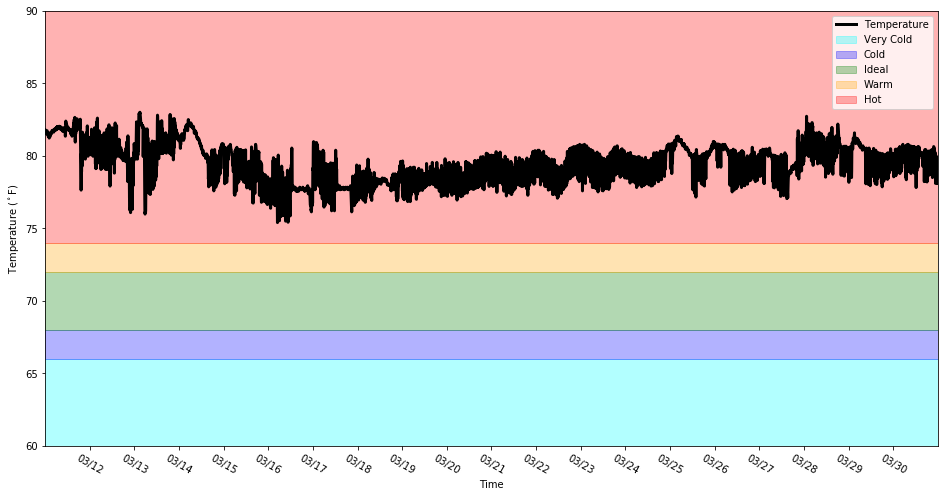

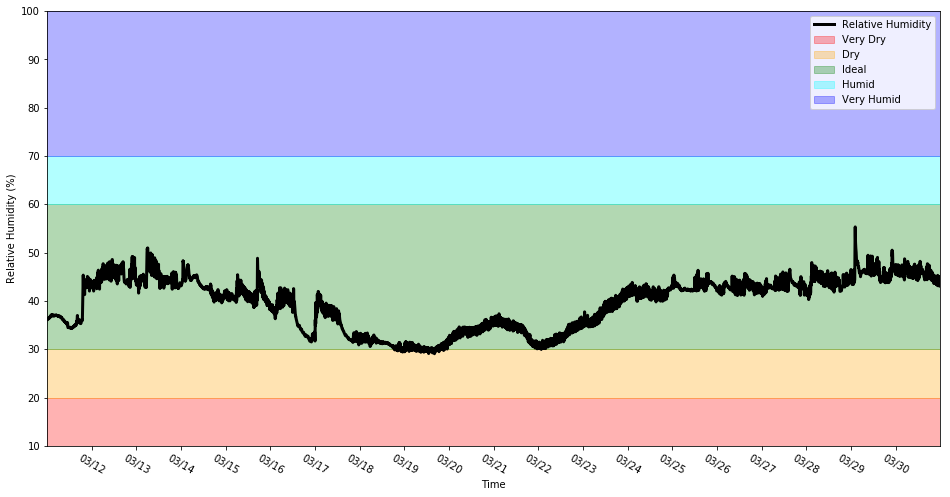

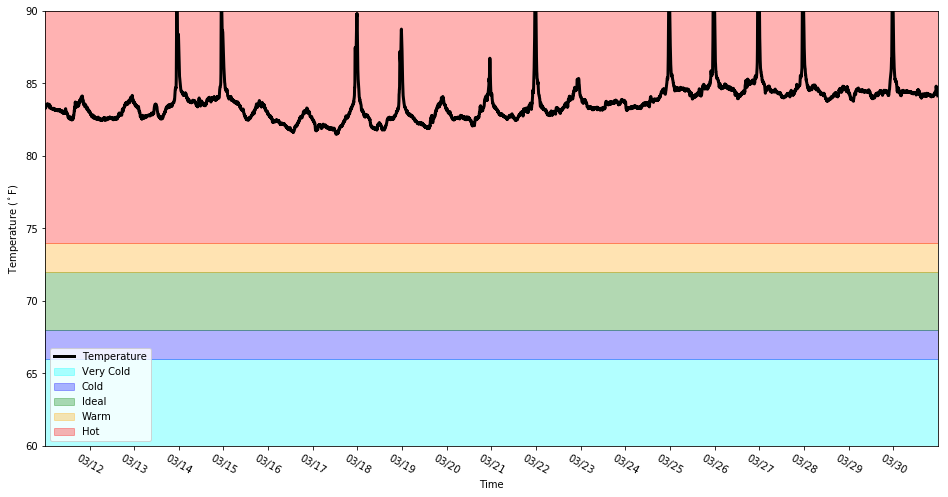

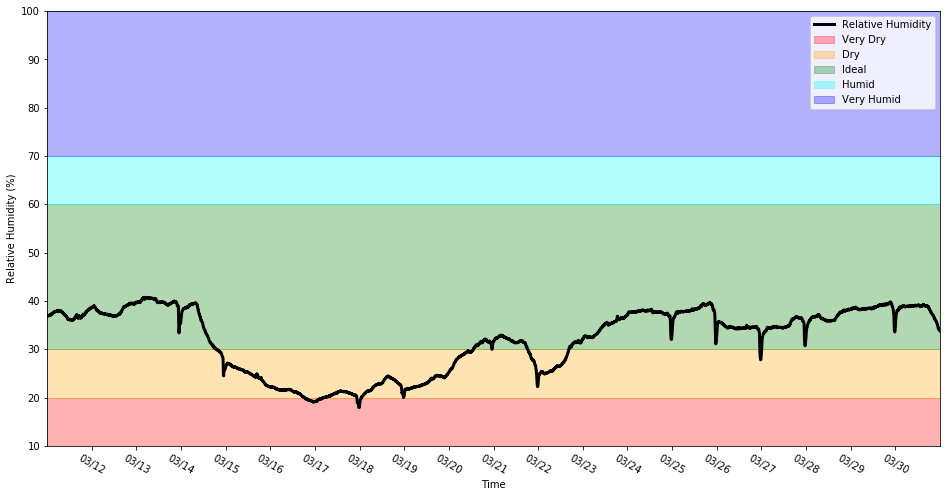

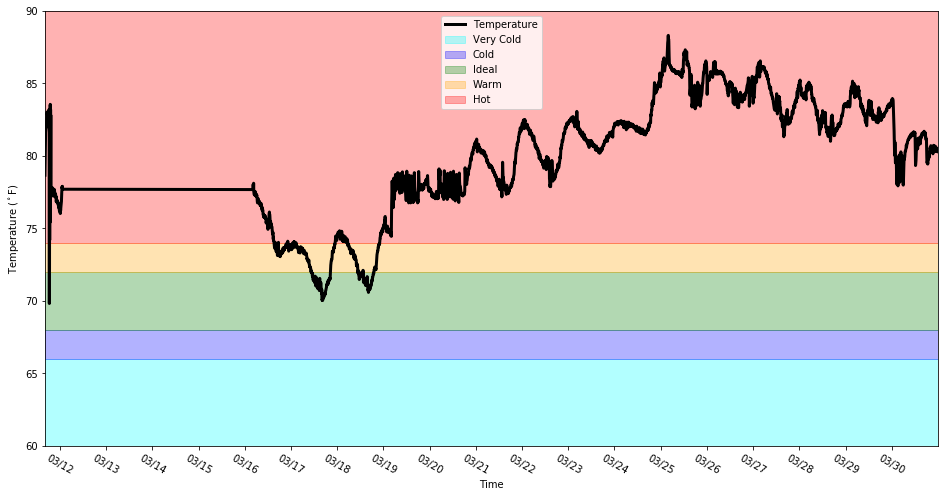

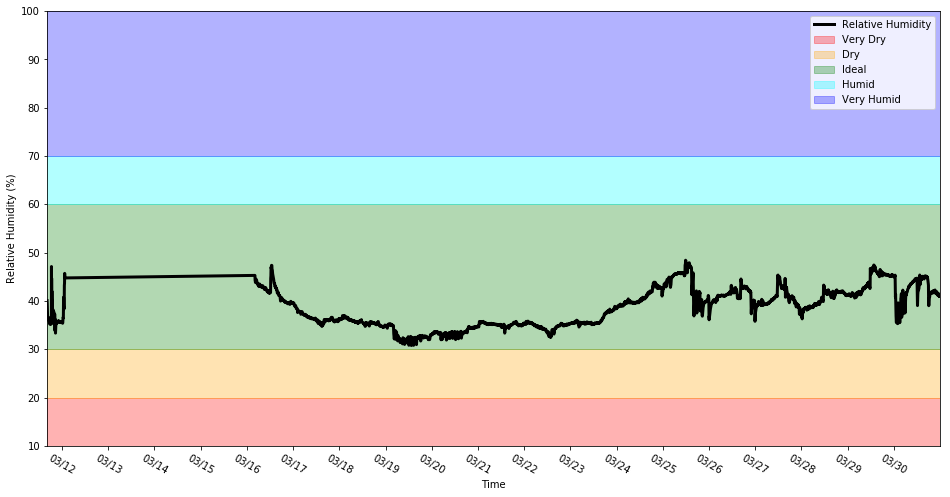

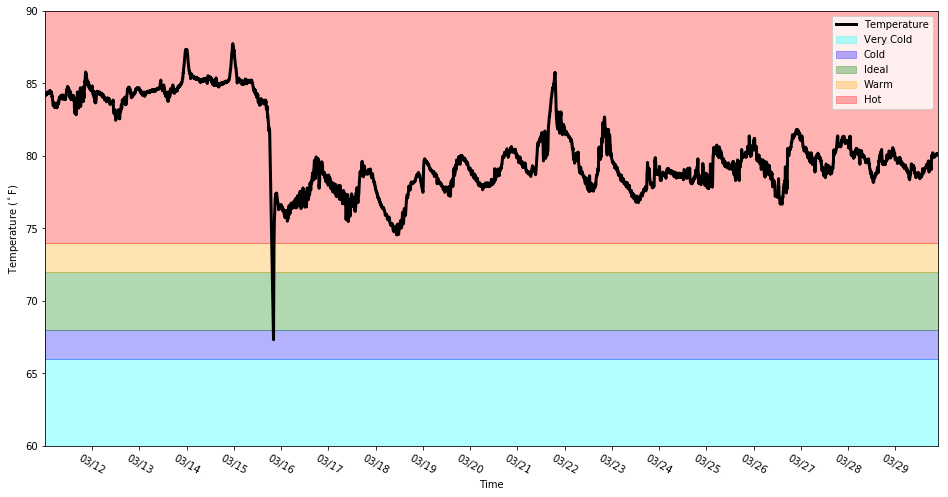

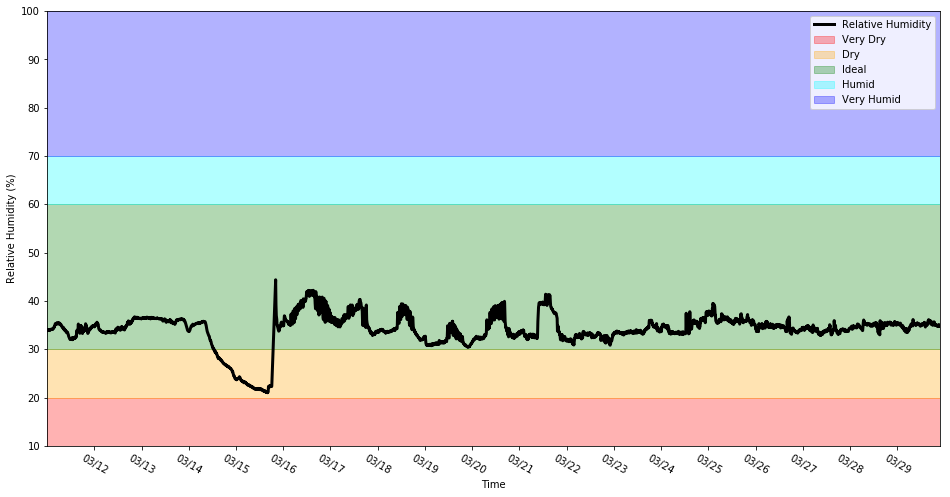

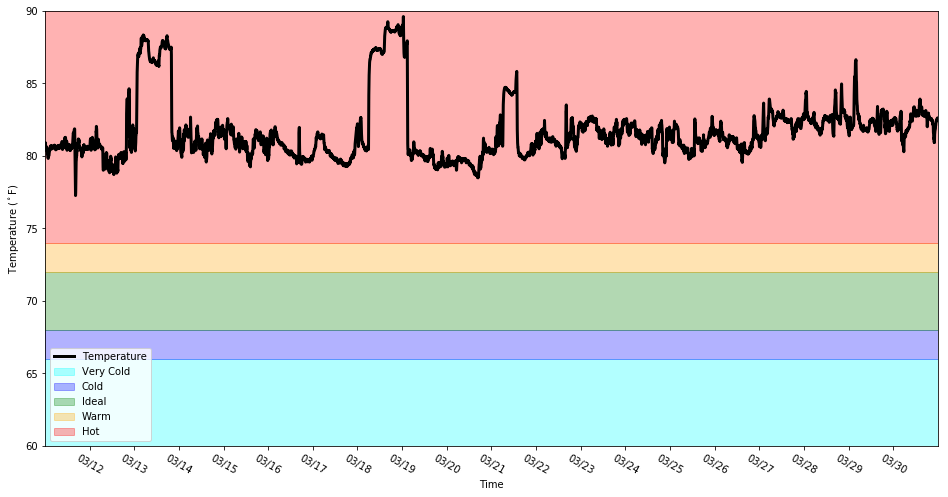

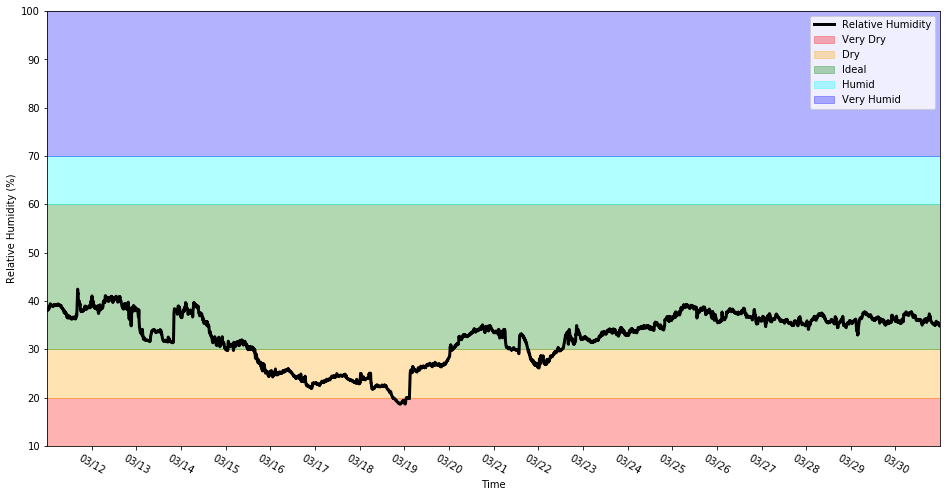

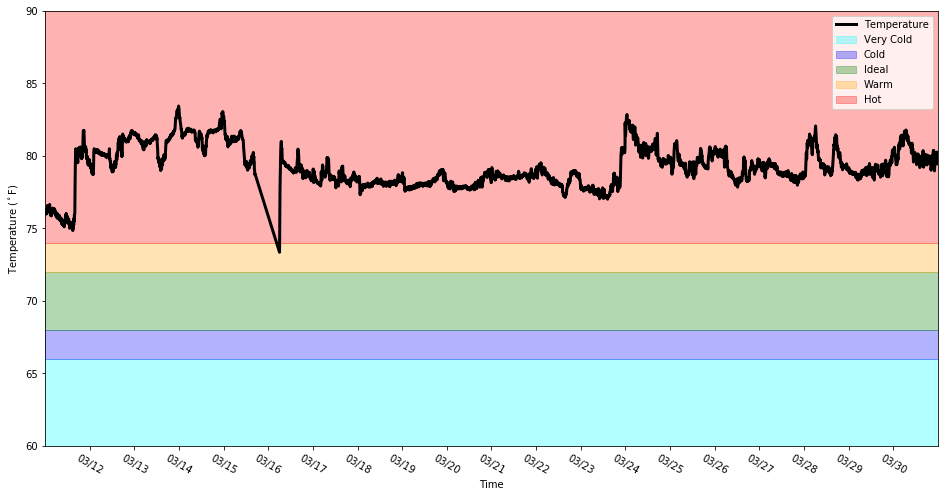

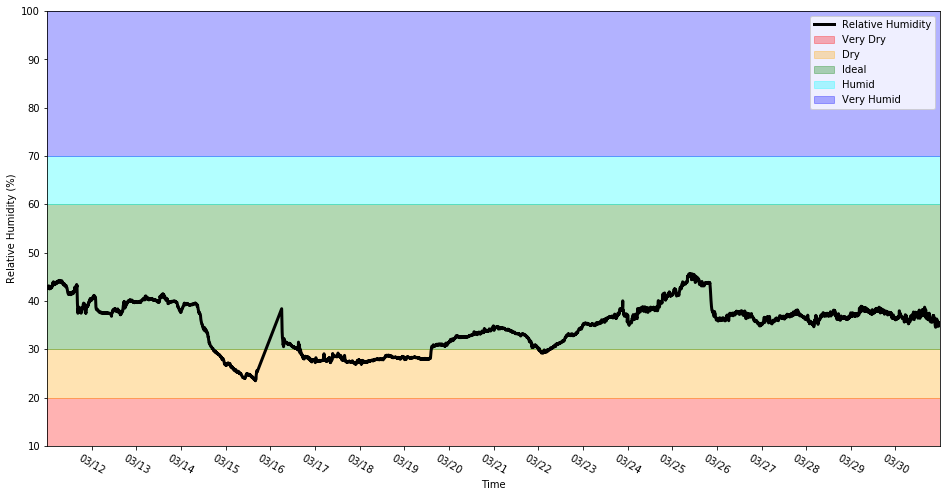

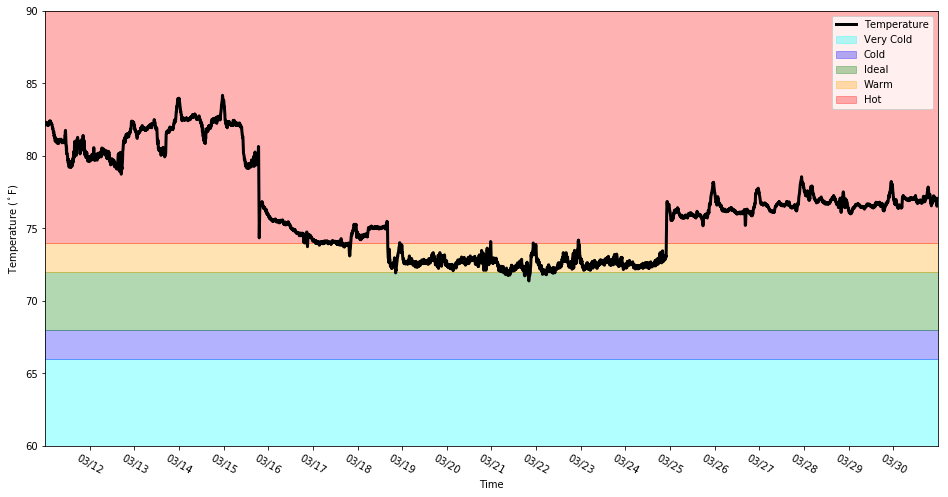

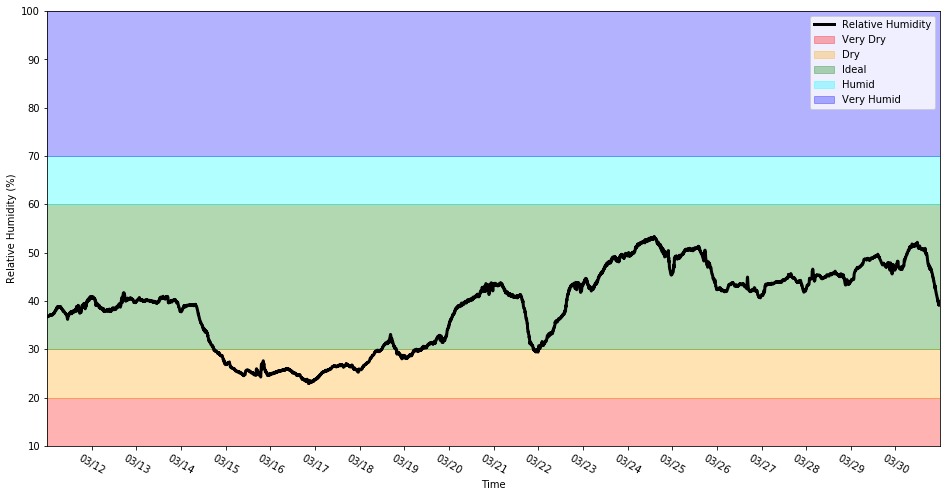

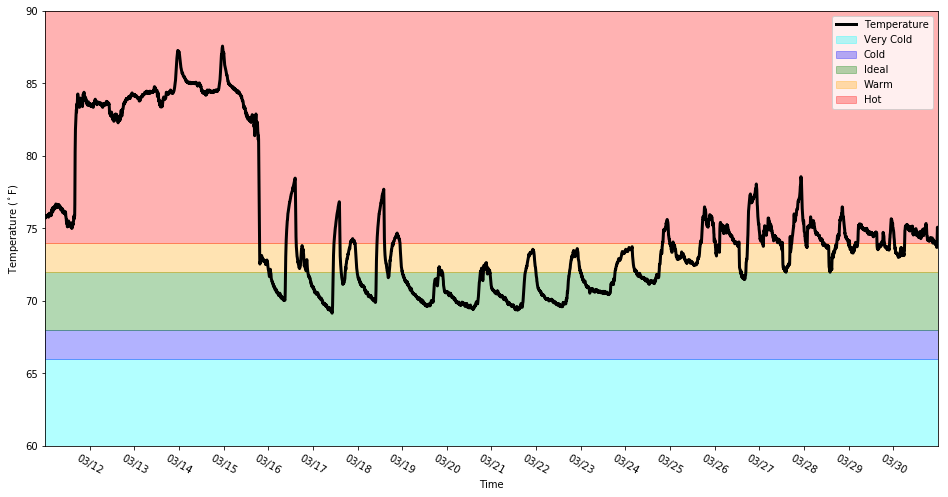

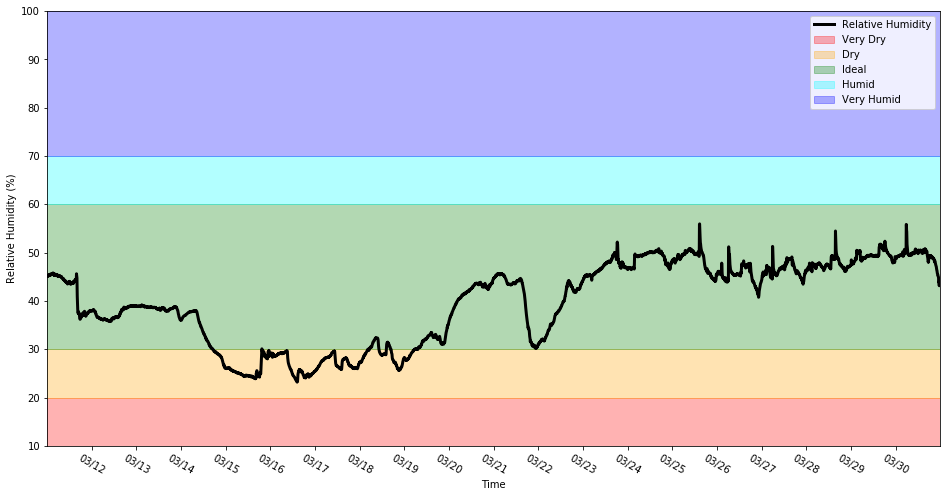

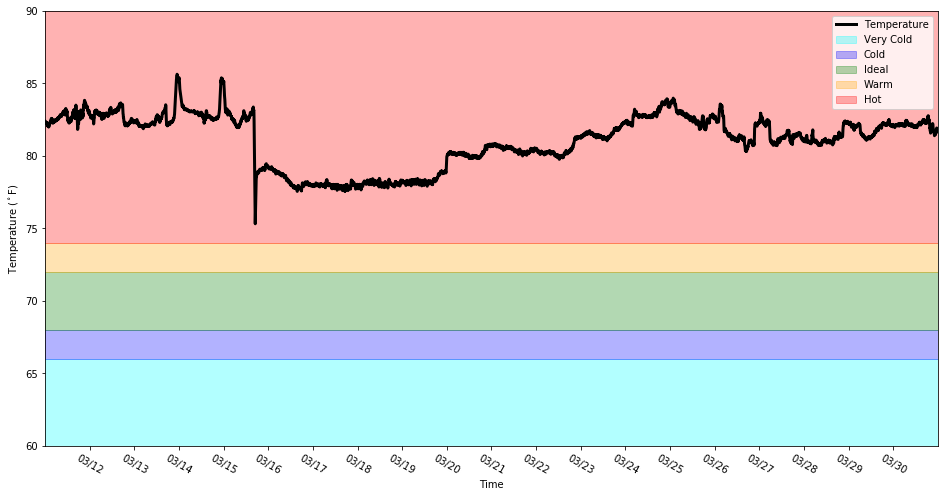

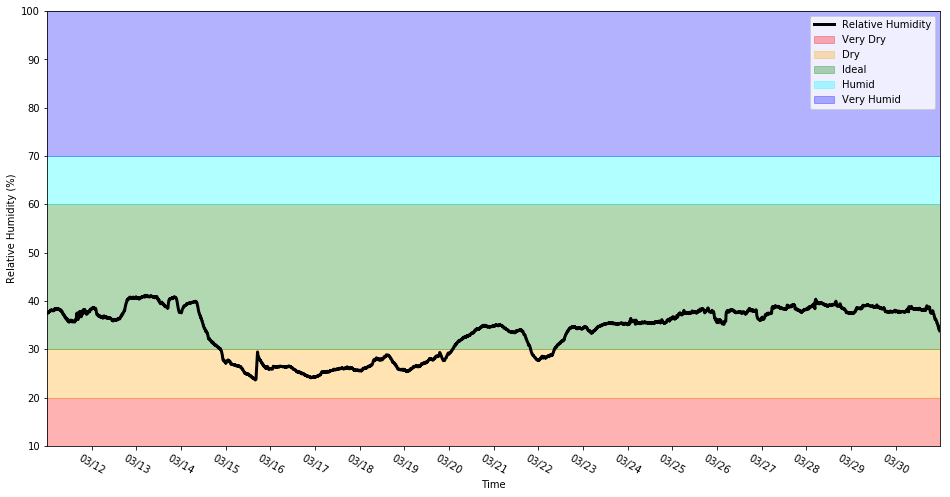

In [5]:
for name in TC_byInd.index:
    
    # ---------------- #
    # Cumulative Plots #
    # ---------------- #
    
    ## Temperature
    plotThermalComfortBands(TC_byInd[name].index,TC_byInd[name]['Temperature'],'Temperature',[60,90],False)
    saveFigure(name + '_Temperature','Figures/',save=False)
    ## Relative Humidity
    plotThermalComfortBands(TC_byInd[name].index,TC_byInd[name]['RH'],'Relative Humidity',[10,100],False)
    saveFigure(name + '_RH','Figures/',save=False)
    
    # Getting data by day
    ## Creating new columns in the dataframe that store the month and date
    TC_byInd[name]['Month'] = TC_byInd[name].index.month        
    TC_byInd[name]['Day'] = TC_byInd[name].index.day
    ## Splitting the dataframe by the month and day to get a dataframe per day
    agg = TC_byInd[name].groupby(['Month','Day'])
    
    # ------------ #
    # Plots by Day #
    # ------------ #
    
    byDay = False
    
    if byDay == True:
        index = 0
        medians = []
        date_list = []
        for group in agg:
            ## Converting the group into a dataframe
            group = pd.DataFrame(data=group[1])
            ## Plotting Temperature profile
            plotThermalComfortBands(group.index,group['Temperature'],'Temperature',[60,90],True,index+1)
            saveFigure(name + '_' + str(group.index[0].month) + str(group.index[0].day) + '_Temperature','Figures/',save=False)
            ## Plotting RH profile
            plotThermalComfortBands(group.index,group['RH'],'Relative Humidity',[10,100],True,index+1)
            saveFigure(name + '_' + str(group.index[0].month) + str(group.index[0].day) + '_RH','Figures/',save=False)
            ###Getting Median statistics
            medians.append(group['Temperature'].median())
            date_list.append(group.index[0])
            index += 1

### PM2.5
There are three main PM2.5 Concentration figures:
1. Time Series showing daily PM2.5 concentrations in their home
2. Time Series showing daily AQI for PM2.5 in their home
3. Bar Chart showing daily median concentrations in their home

#### PM2.5 Concentration Profile

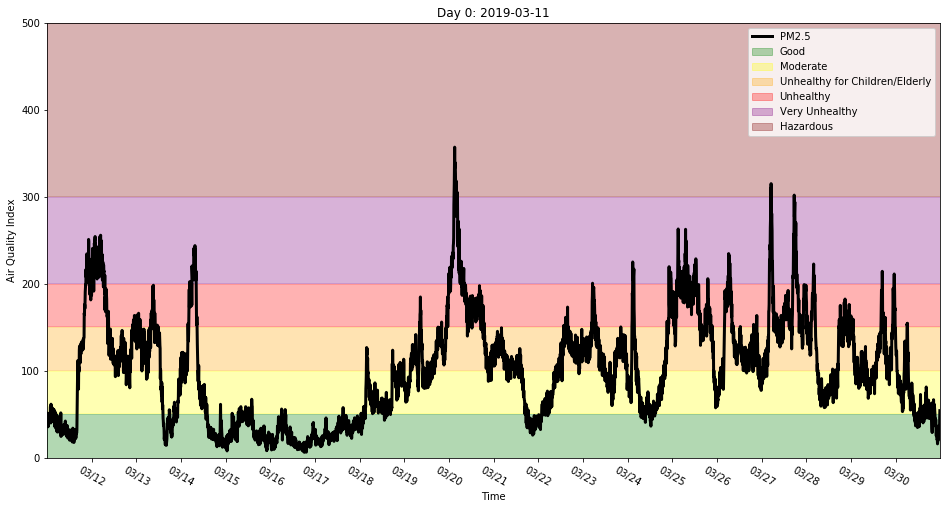

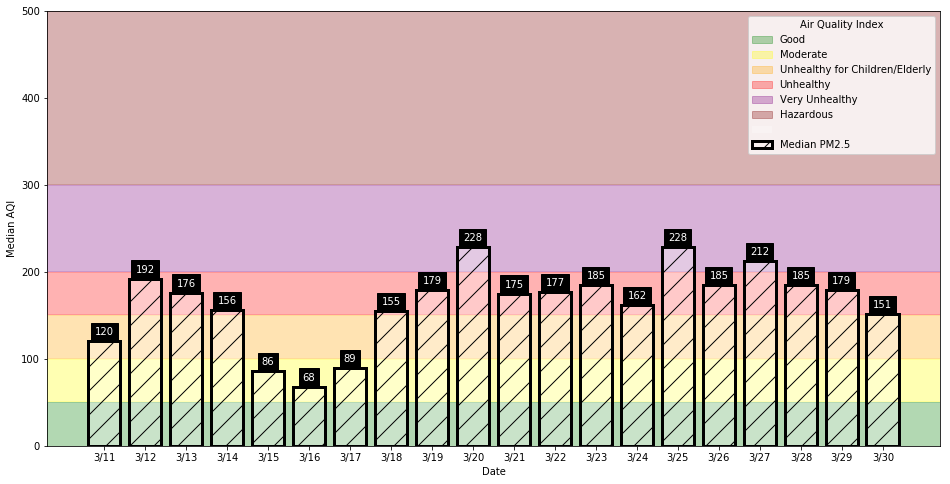

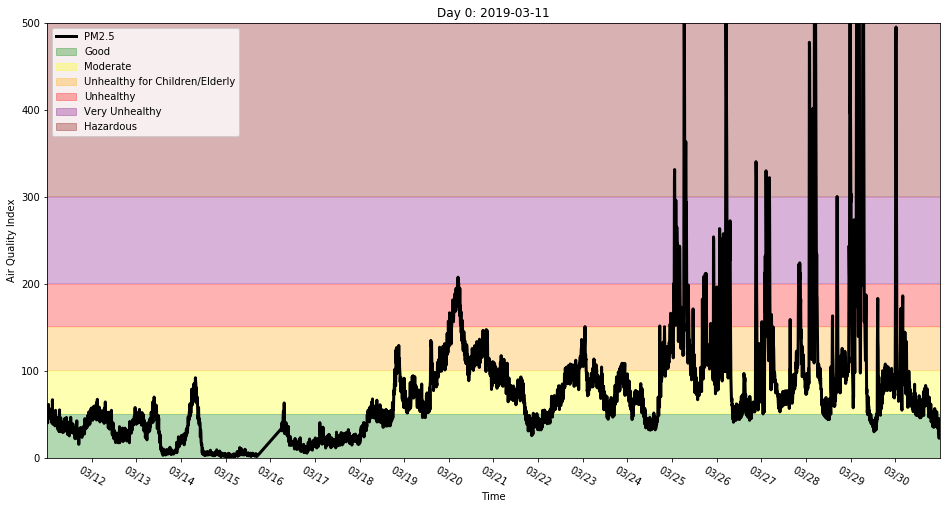

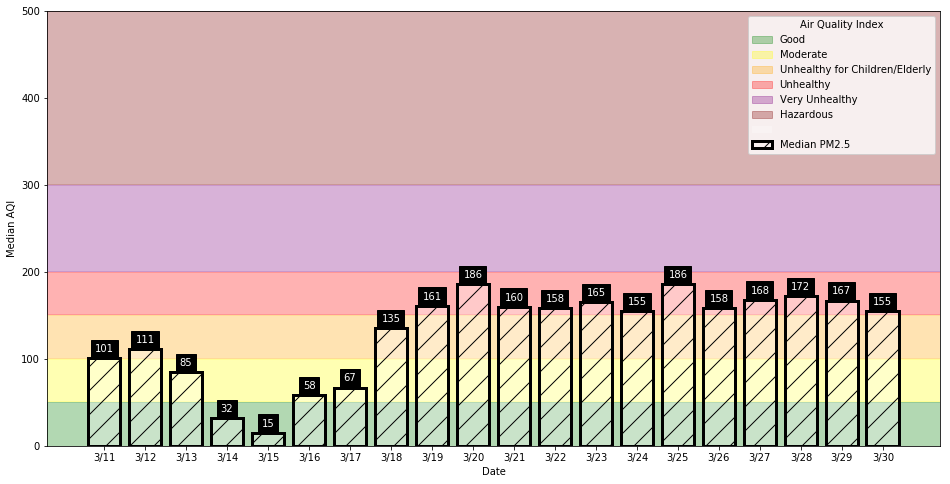

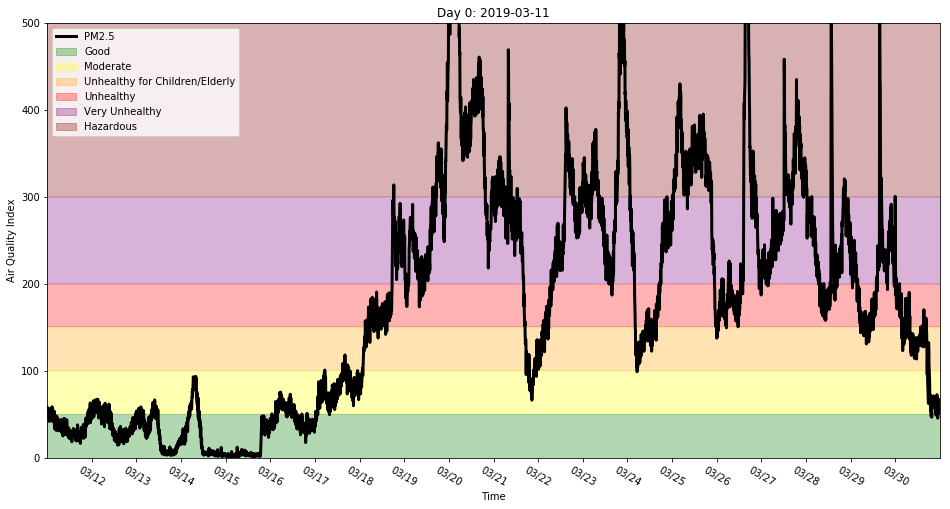

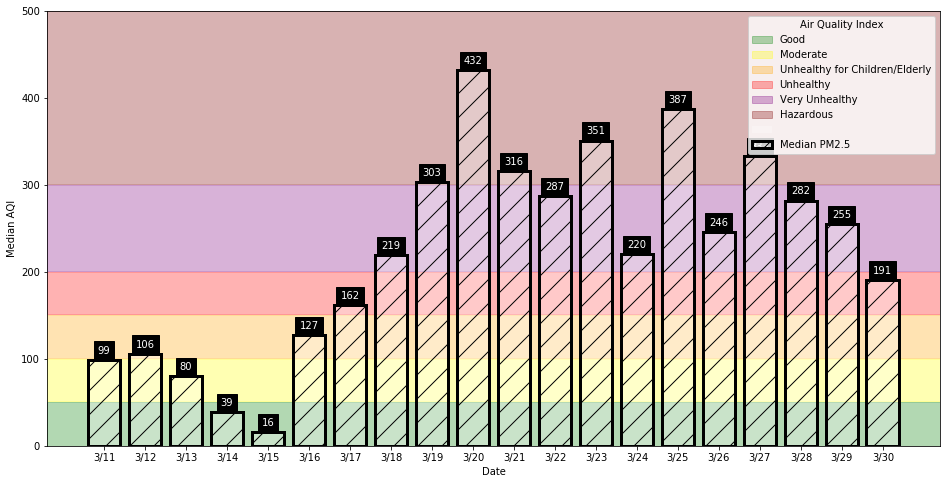

In [6]:
# Looping through all the imported data
for name in Concentration_byInd.index:
    
    # Creating new columns in the dataframe that store the month and date
    Concentration_byInd[name]['Month'] = Concentration_byInd[name].index.month        
    Concentration_byInd[name]['Day'] = Concentration_byInd[name].index.day
    ## Splitting the dataframe by the month and day to get a dataframe per day
    agg = Concentration_byInd[name].groupby(['Month','Day'])
    
    # ------------ #
    # Plots by Day #
    # ------------ #
    
    byDay = False
    
    index = 0
    medians = []
    date_list = []
    for group in agg:
        ## Converting the group into a dataframe
        group = pd.DataFrame(data=group[1])
        if byDay == True:
            ## Plotting Concentration profile
            plotFinePMTimeSeries(group.index,group['PM2.5'],'Concentration ($\mu$g/m$^3$)',True,index+1)
            saveFigure(name + '_' + str(group.index[0].month) + str(group.index[0].day) + '_PM_Concentration','Figures/',save=False)
            ## Plotting AQI profile
            plotFinePMTimeSeries(group.index,getAQI(group['PM2.5']),'Air Quality Index',True,index+1)
            saveFigure(name + '_' + str(group.index[0].month) + str(group.index[0].day) + '_PM_AQI','Figures/',save=False)
        ## Getting median statistics
        medians.append(group['PM2.5'].median())
        date_list.append(group.index[0])
        index += 1
        
    # ---------------- #
    # Cumulative Plots #
    # ---------------- #
    
    ## Concentration Time Series
    plotFinePMTimeSeries(Concentration_byInd[name].index,Concentration_byInd[name]['PM2.5'],'Air Quality Index',False)
    saveFigure(name + '_PM_AQI','Figures/',save=False)
    ## Concnetration Median
    plotFinePMMedian(date_list,getAQI(medians))
    saveFigure(name + '_PM_AQIBar','Figures/',save=False)

### Sleep Stages/Quality
There are two main Sleep Quality figures:
1. Bar Chart showing percent of time spent in each sleep stage.
    - Sleep Efficiency grade is also placed on the bar chart.
    - The following blurb should accompany the figure:
        
> The percent of time adults should spend in each of the three sleep stages is shown below:
> - Awake: 5%- 20%
> - REM: 13% - 23%
> - Non-REM: 52% - 83%
>
> Grades for sleep efficiency are explained below:
> - A: **Better than average** - 90% to 100% of the time you spend in bed, you are asleep. 
> - B: **Average** - 85% to 90% of the time you spend in bed, you are asleep. Most adults have sleep efficiencies around 85%. 
> - C: **Below Average** - 80% to 85% of the time you spend in bed, you are asleep. You should seek out ways to improve your sleep efficiency. Even minor improvements can lead to large health benefits. 
> - F: **Dangerous** - 80% or less of the time you spend in bed, you are asleep. You might be suffering from differeny types of sleep apnoea. You should seek medical advice at your next check-up. 
        
2. Grouped bar chart showing the percentage of time spent in each sleep stage with a hashed area showing the recommended adult percentages. 

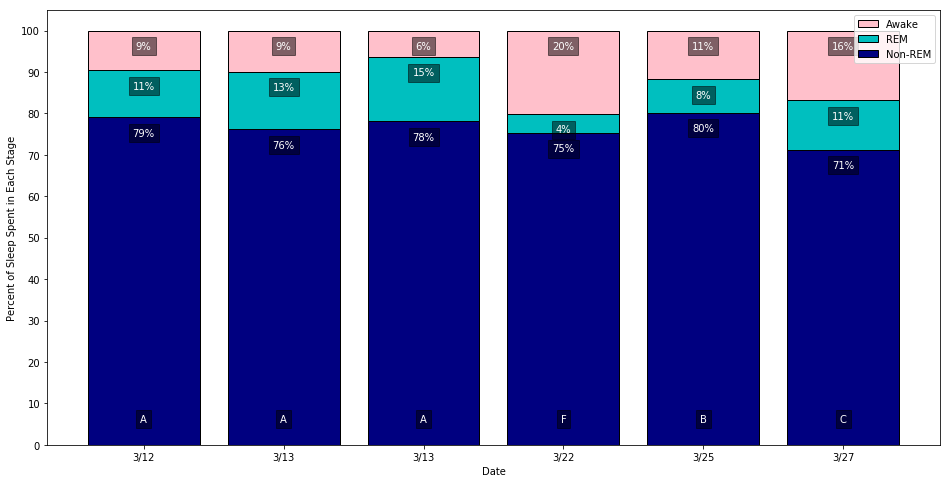

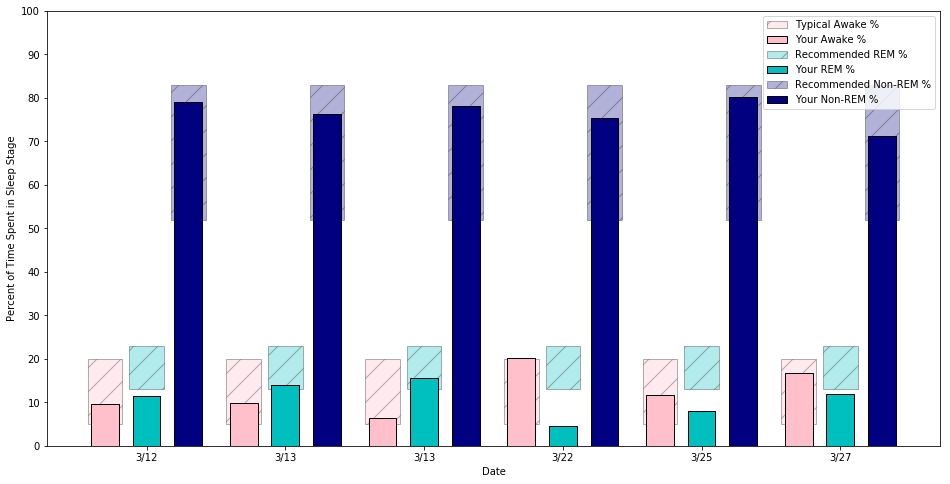

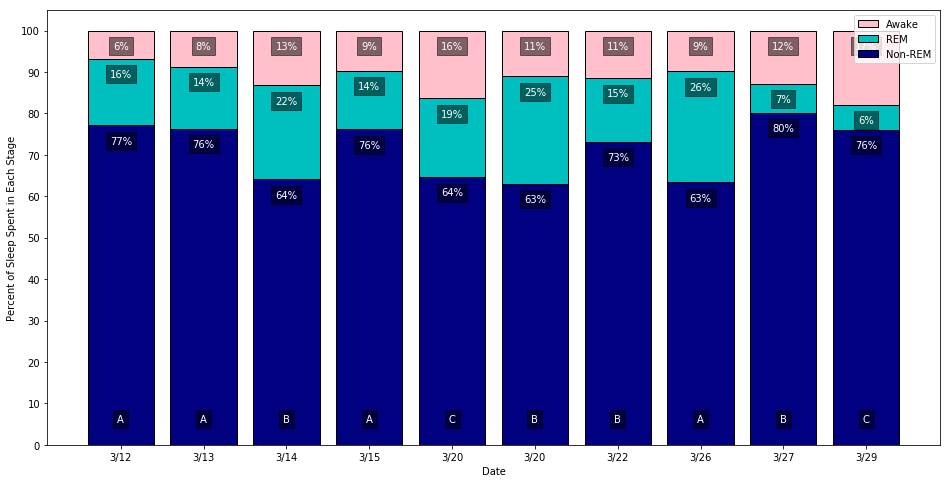

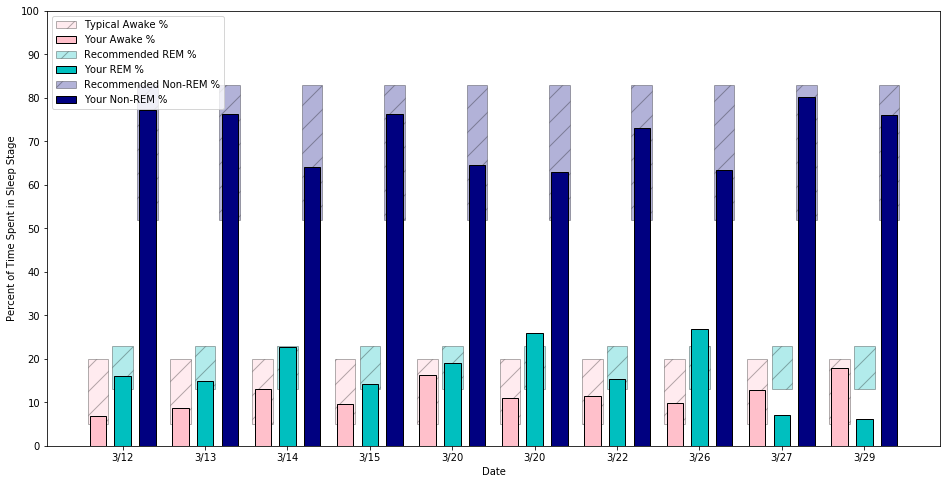

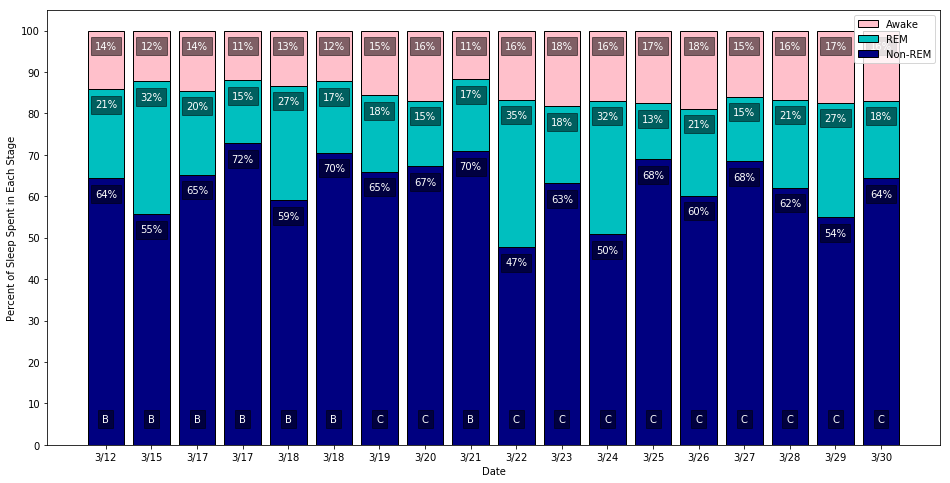

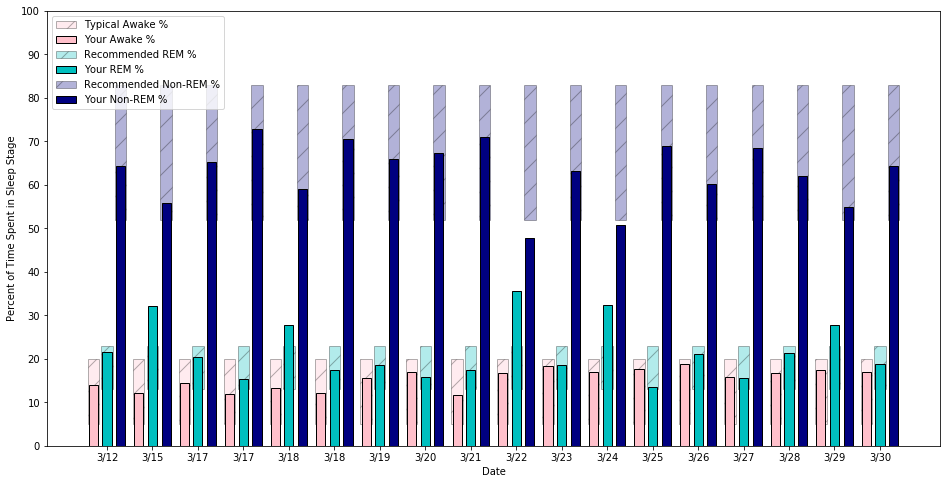

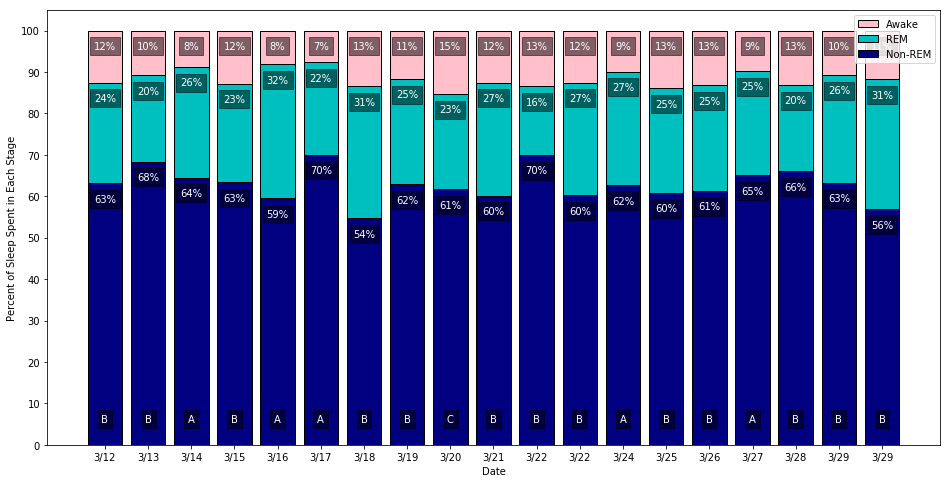

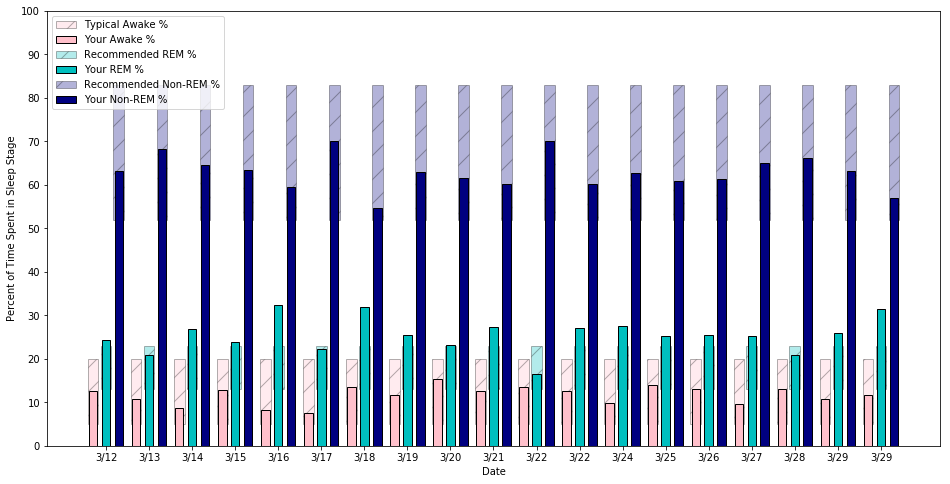

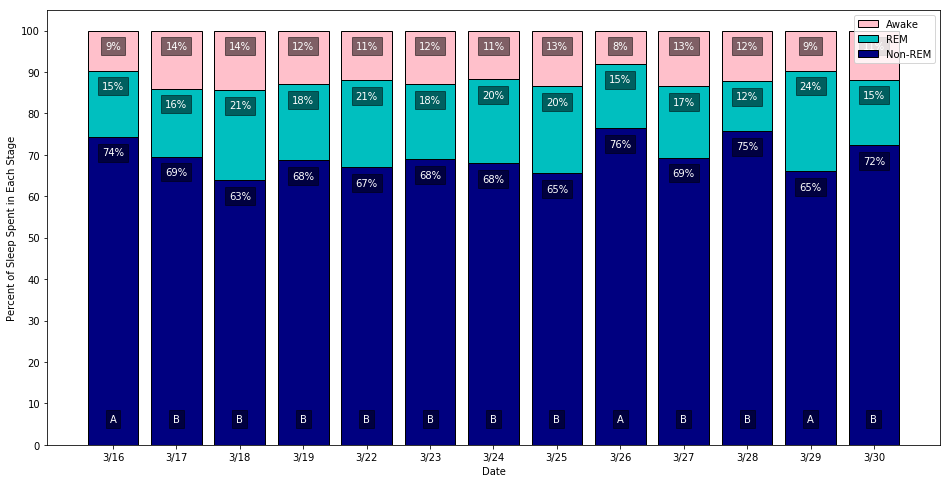

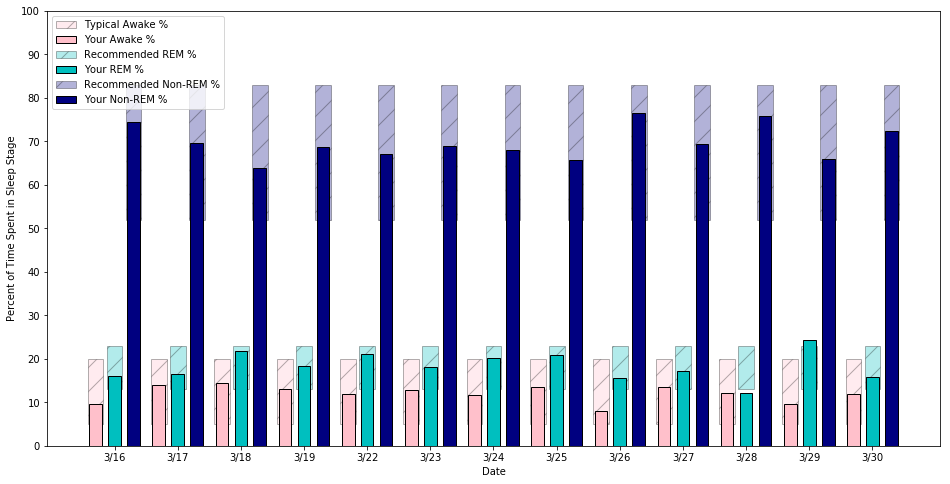

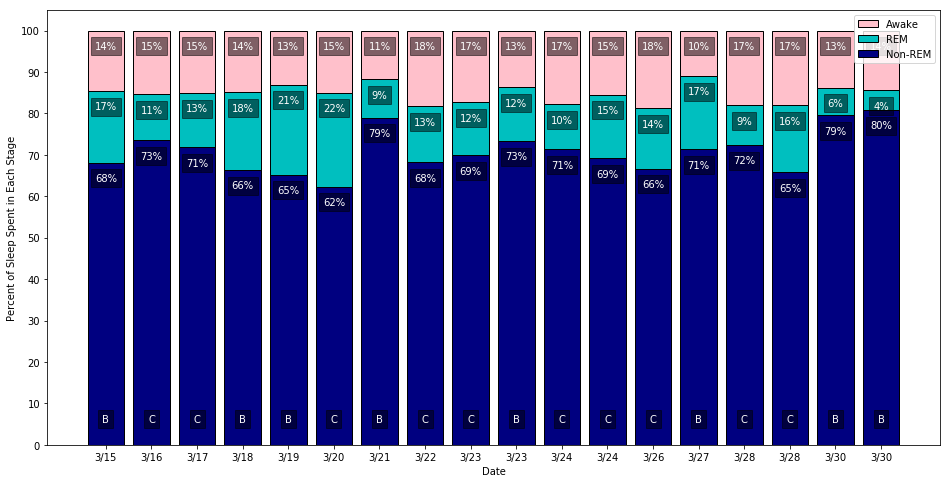

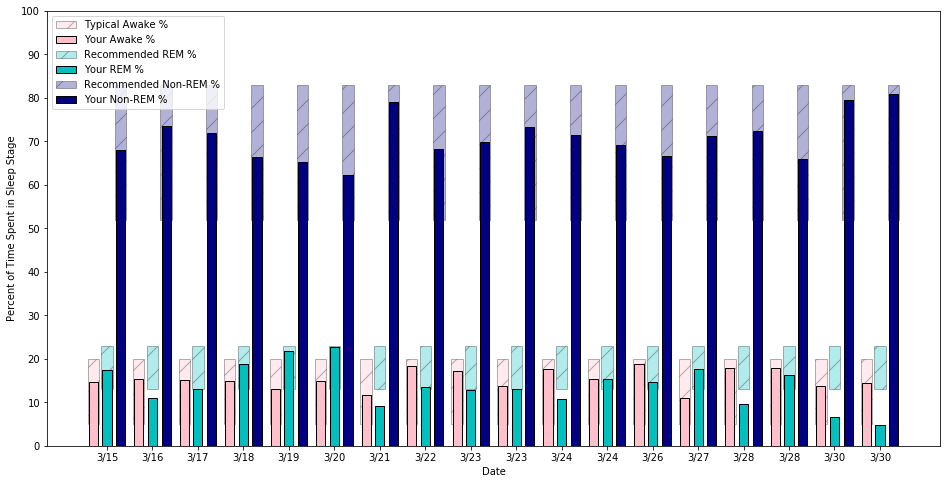

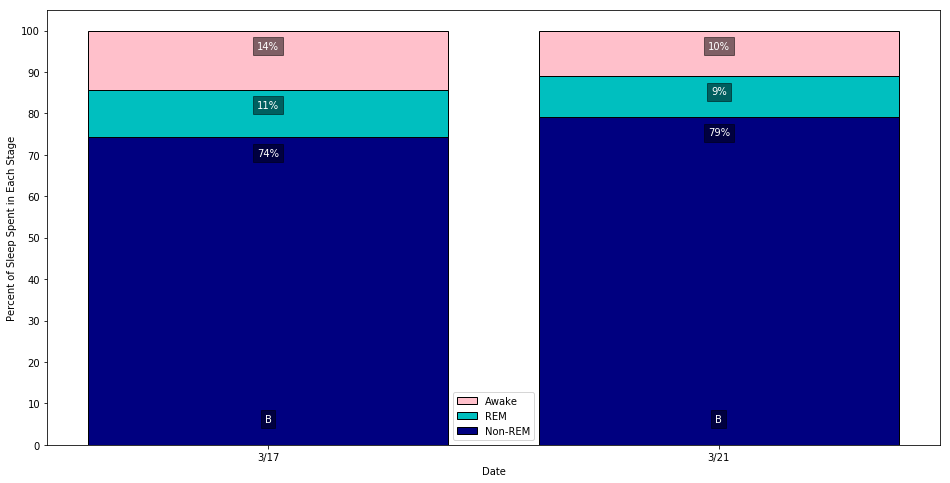

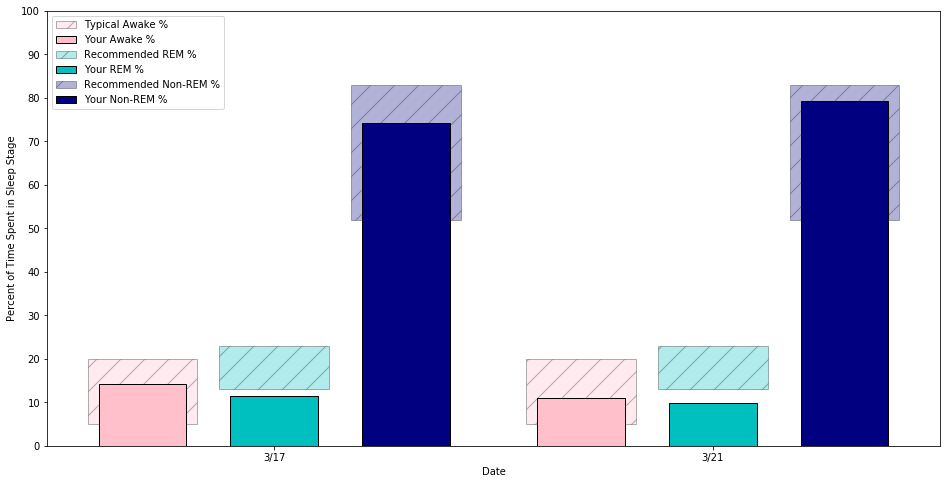

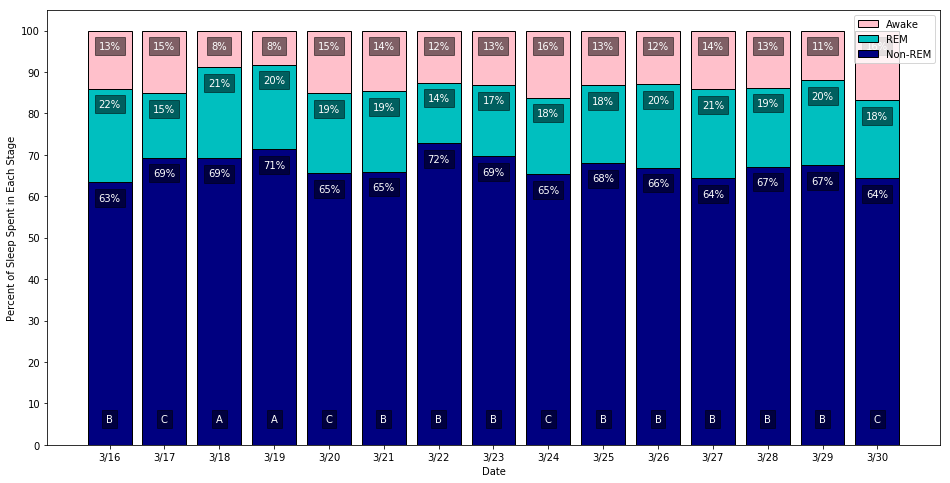

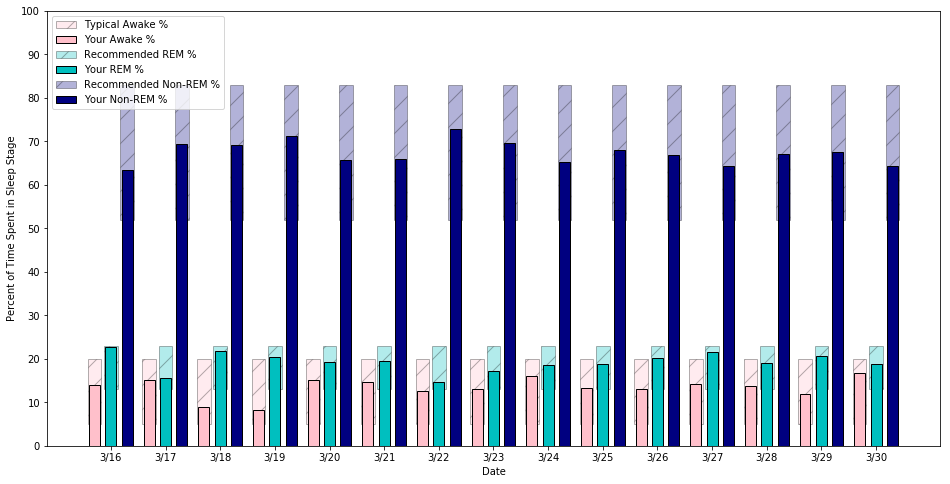

In [7]:
SM_byInd = pd.Series()
for name in SS_byInd.index:
    if len(SS_byInd[name]) > 0:
        # Get various sleep matrics and store them in a new series
        SM_byInd[name] = getSleepMetrics(SS_byInd[name])
        SM_byInd[name] = getSleepEfficiencyGrade(SM_byInd[name])
        # Plot Percentages of Sleep Stages
        plotSleepStagePercentages(SM_byInd[name])
        saveFigure(name + '_SS_Efficiency','Figures/',False)
        # Plot Benchmarks for Sleep Stages
        plotSleepStageBenchmarks(SM_byInd[name])
        saveFigure(name + '_SS_Benchmarks','Figures/',False)

## Bivariate Data Visualization
Below are visualizations that incorporate two variables.

### Sleep Efficiency and PM2.5 Exposure During Sleep
Below are plots that compare one's sleep efficiency to the PM2.5 concentration during the evening when they are asleep. There are currently two ways to compare the data:
1. Peak PM2.5 Concentration in AQI versus Sleep Efficiency
2. Median PM2.5 Concentration in AQI versus Sleep Efficiency

Reading for 19k2rlua
Reading for vvlm8iyi
Reading for uynulntv


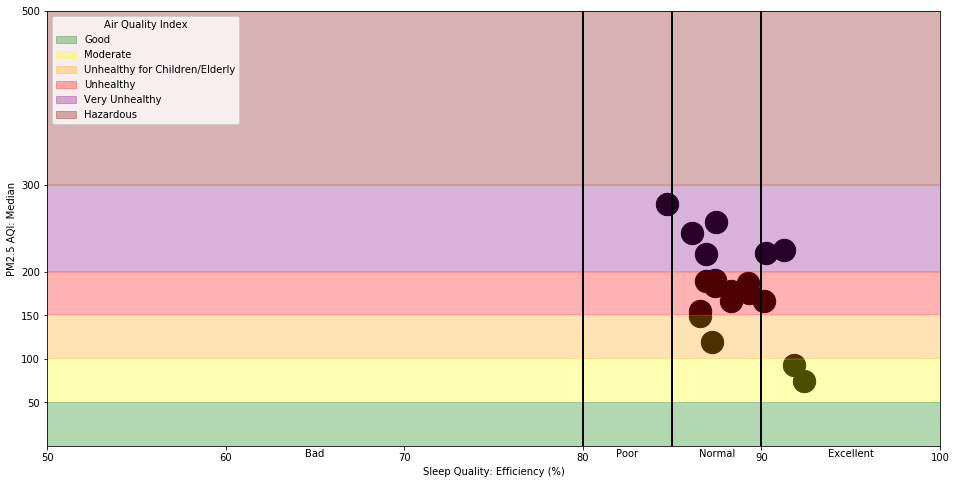

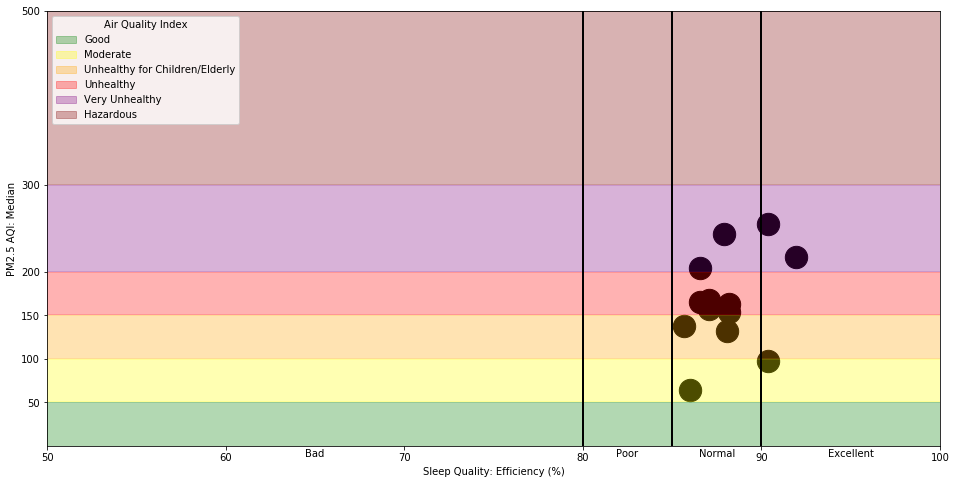

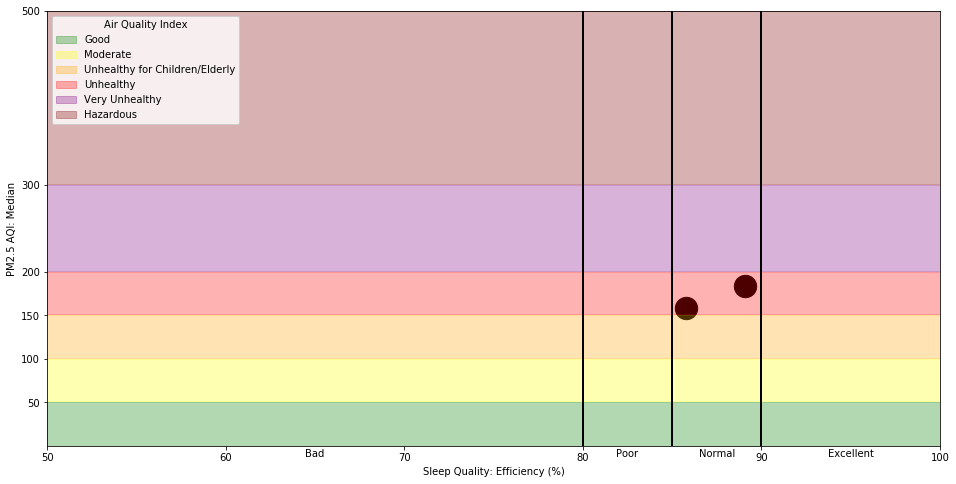

In [8]:
## Storing only the nightly PM data
SleepConcentration_byInd = pd.Series()
PMMetrics_byInd = pd.Series()

for name in SM_byInd.index:
    if name in Concentration_byInd.index:
        print('Reading for', name)
        # Get the PM concentration corresponding to when Fitbit started recording sleep
        SleepConcentration_byInd[name] = getSleepConcentration(Concentration_byInd[name],SS_byInd[name])
        # Converting PM concentration to AQI
        SleepConcentration_byInd[name]['AQI'] = getAQI(SleepConcentration_byInd[name]['PM2.5'])
        # Getting PM metrics for the nightly concentrations
        PMMetrics_byInd[name] = getPMMetrics(SleepConcentration_byInd[name]['AQI'])
        
        # Plotting PM and Sleep Metrics
        
        ## --- Change these values here --- ##
        # PM2.5 Metric 
        cm = 'Median'
        # Sleep Metric
        sm = 'Efficiency'
        ## -------------------------------- ##
        
        plotPMandSleepEfficiency(PMMetrics_byInd[name],cm,SM_byInd[name],sm,[50,100])
        saveFigure(name + '_' + cm + 'vs' + sm,'Figures/',False)

### Sleep Metrics and Perceived Sleep Quality
The following plots compare sleep emtrics calculated via Fitbit's measured sleep stages and and individual's perceived sleep quality gathered via morning surveys from Beiwe. The current sleep metrics calculated from Fitbit available are:
1. Time Asleep
2. Sleep Latency
3. Efficiency
4. Percent of Time Awake
5. Percent of Time Spent in REM
6. Percent of Time Spent in non-Rem

The current perceived sleep quality "scores" are:
1. Aggregate (sum of time asleep, restfullness score, and refreshed score)
2. Refresh and Relax (sum of restfullness score and refreshed score)

The following code allows for any combination of the above derivatives.

Reading for td5gmdi8
Reading for fwx7pdjp
Reading for 7ao7sz2v
Reading for vvlm8iyi
Reading for 36dsqll3
Reading for uynulntv


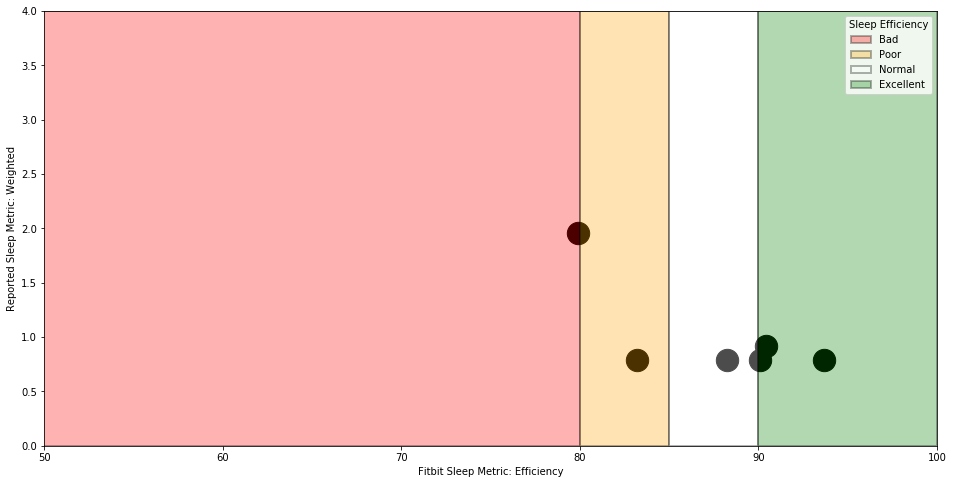

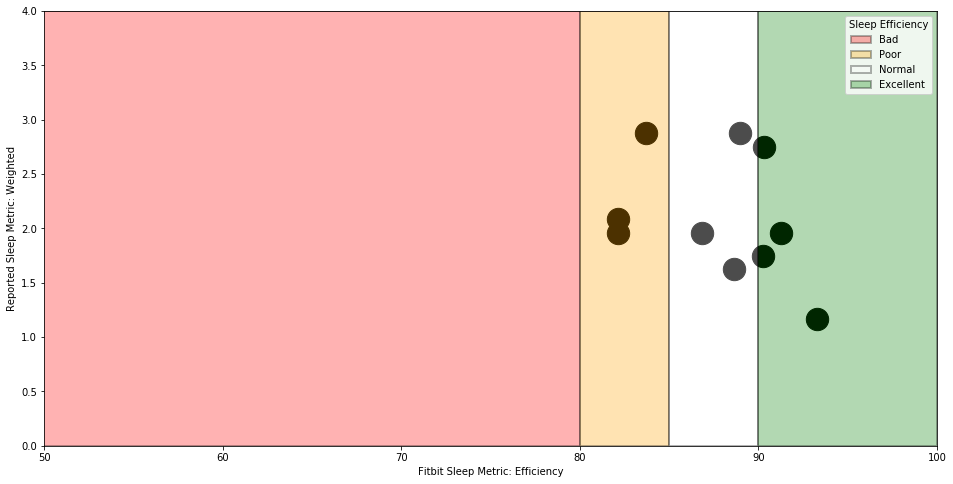

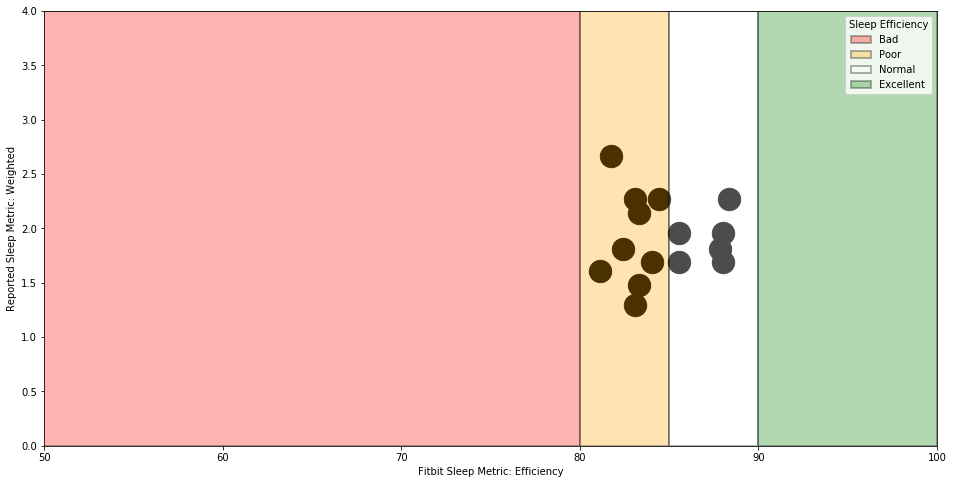

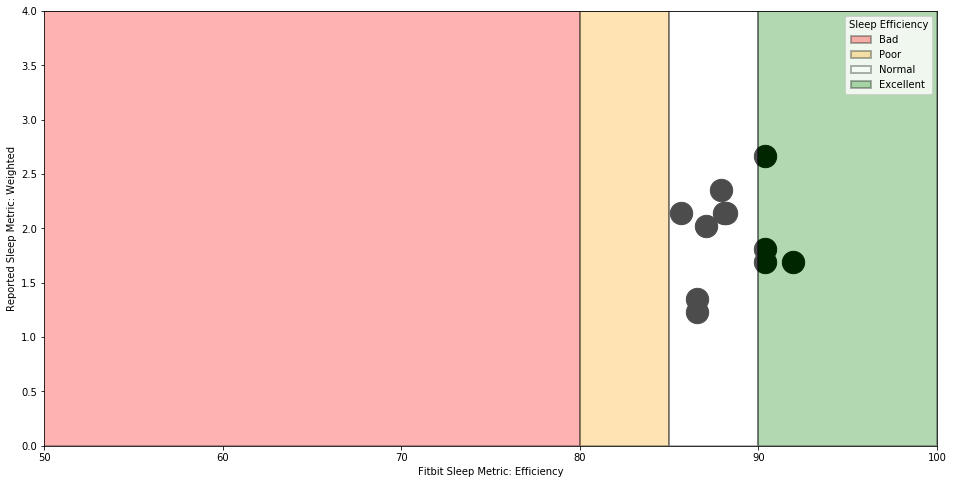

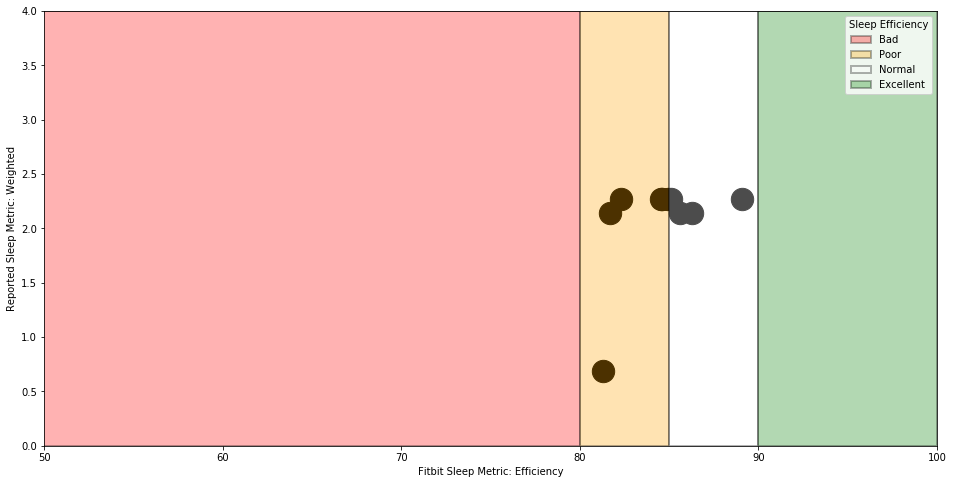

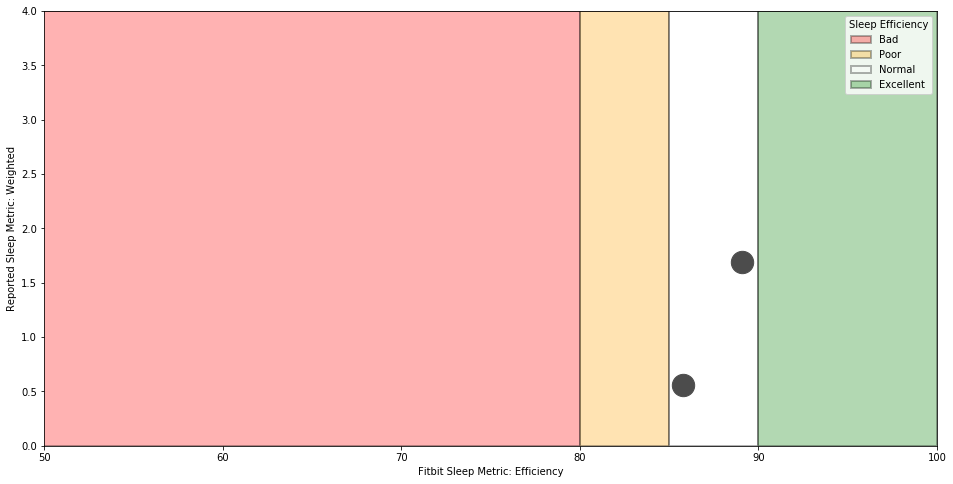

In [9]:
for name in SM_byInd.index:
    if name in PSQ_byInd.index:
        if len(PSQ_byInd[name]) > 0 and len(SM_byInd[name]) > 0:
            print('Reading for',name)
            
            ## --- Change these values here --- ##
            sleep_metric = 'Efficiency'
            sm_lim = [50, 100]
            sleep_score = 'Weighted'
            psm_lim = [0, 4]
            ## -------------------------------- ##
            
            compareSleepQuality(SM_byInd[name],PSQ_byInd[name],sleep_metric,sm_lim,sleep_score,psm_lim)
            saveFigure(name + '_Beiwe' + sleep_score + 'vsFB' + sleep_metric,'Figures/',False)

## Testing Lambda Functions

In [50]:
# Common Imports
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num

# Data Import Module
%run ./Module_LambdaFunctions.ipynb


In [11]:
TC_hourly_mean,TC_hourly_mean_byID = lambdaThermalConditions(start_date,end_date)


In [47]:
IAQ_hourly_mean,IAQ_hourly_mean_byID,temp,nightly_temp = lambdaIAQ(start_date,end_date)


No data available for this ID
No data available for this ID


In [51]:
SS_byID, SM_byID, SM = lambdaSleepStages(start_date,end_date)


No data available for this ID
No data available for this ID


In [52]:
Surveys_byID = lambdaSleepSurveys(start_date,end_date)


## Daily Heat Maps

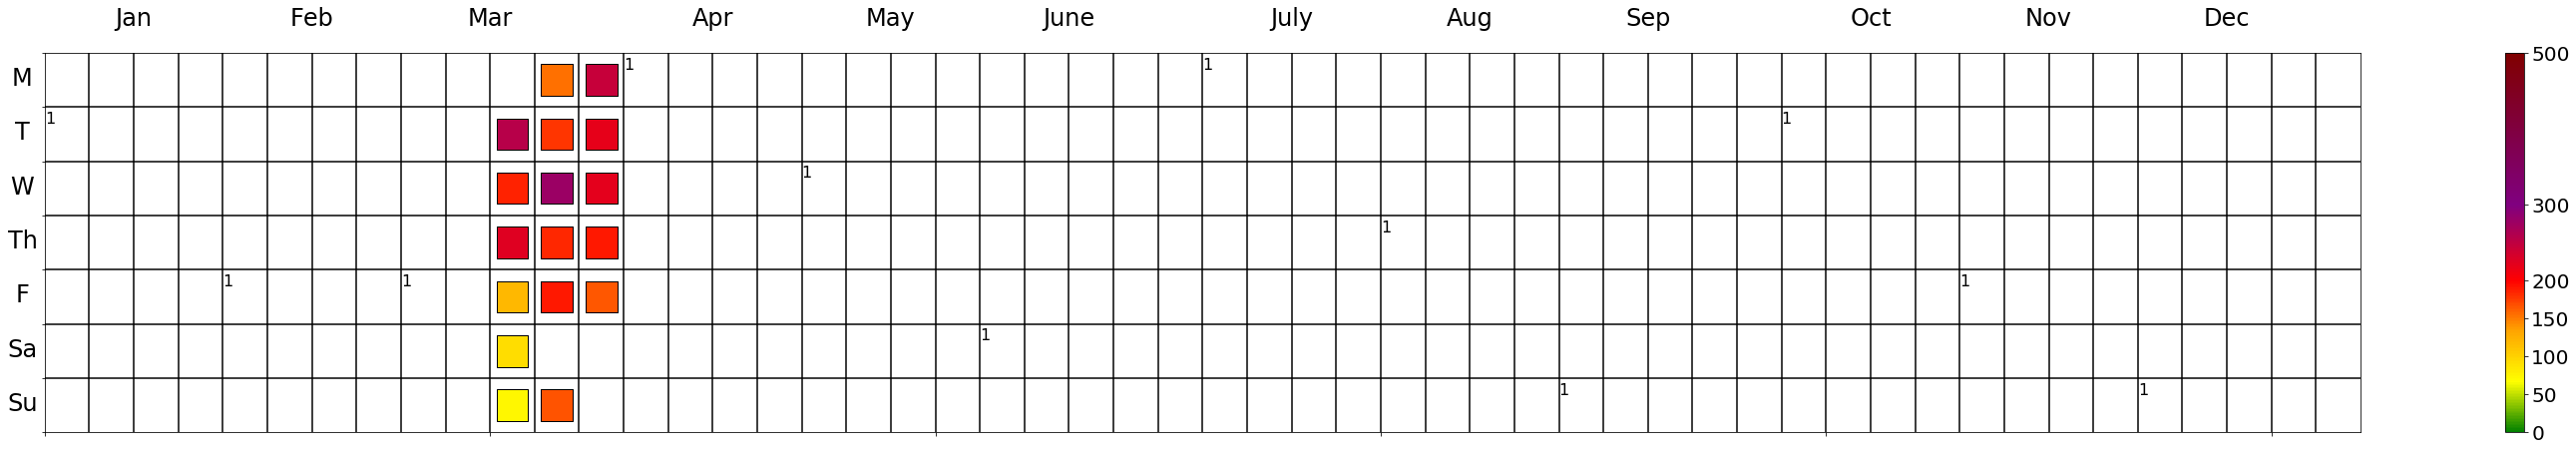

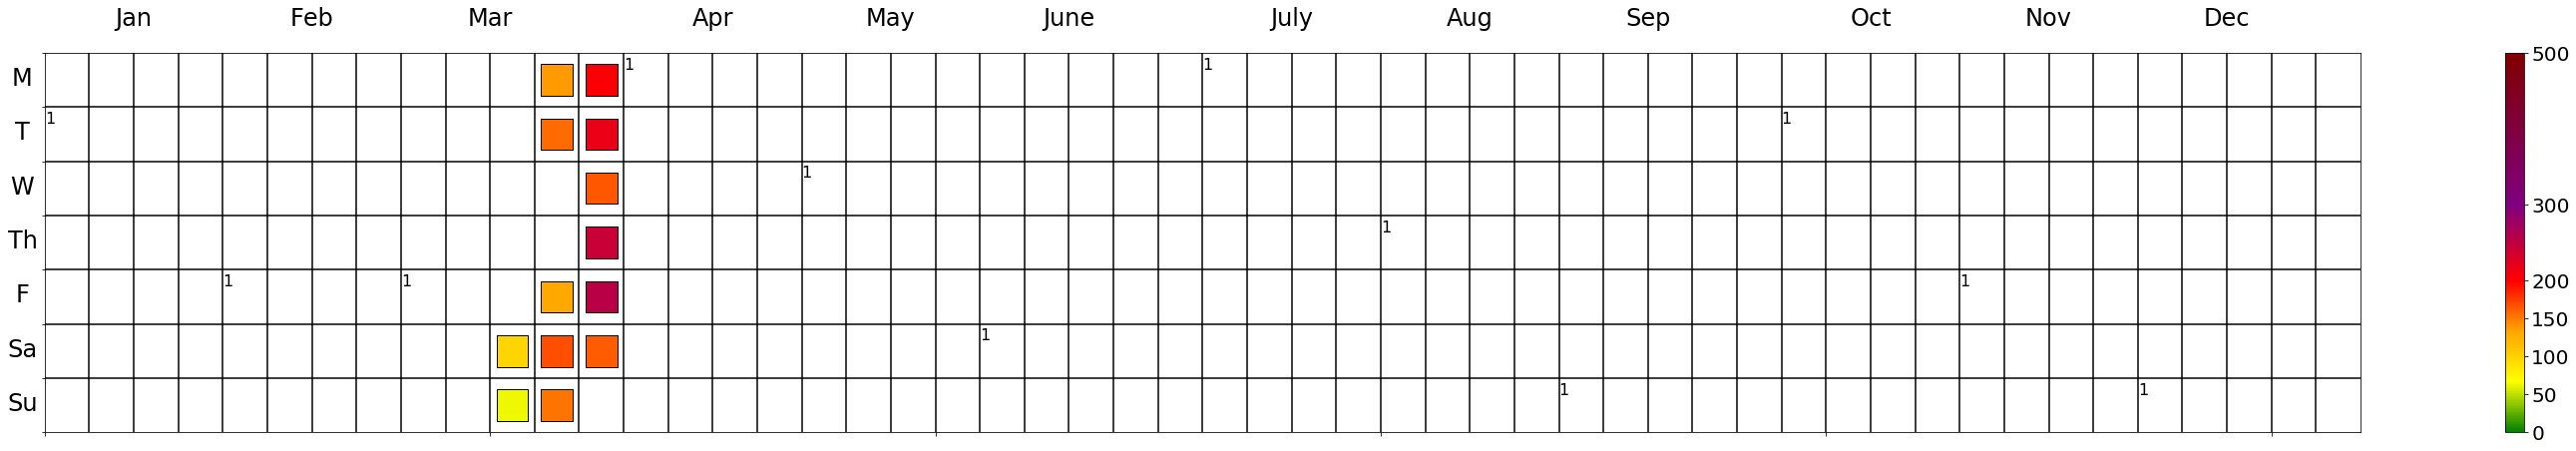

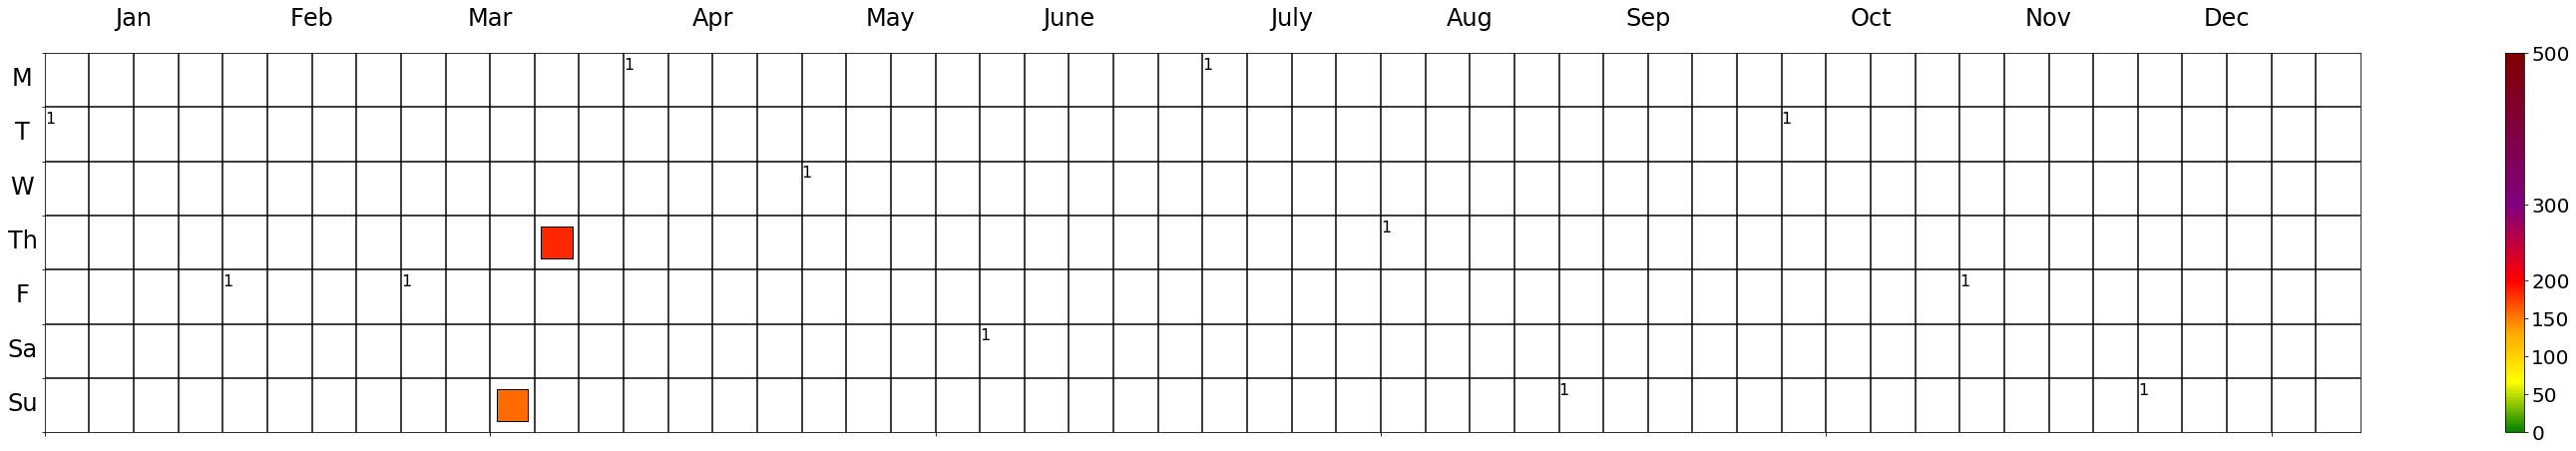

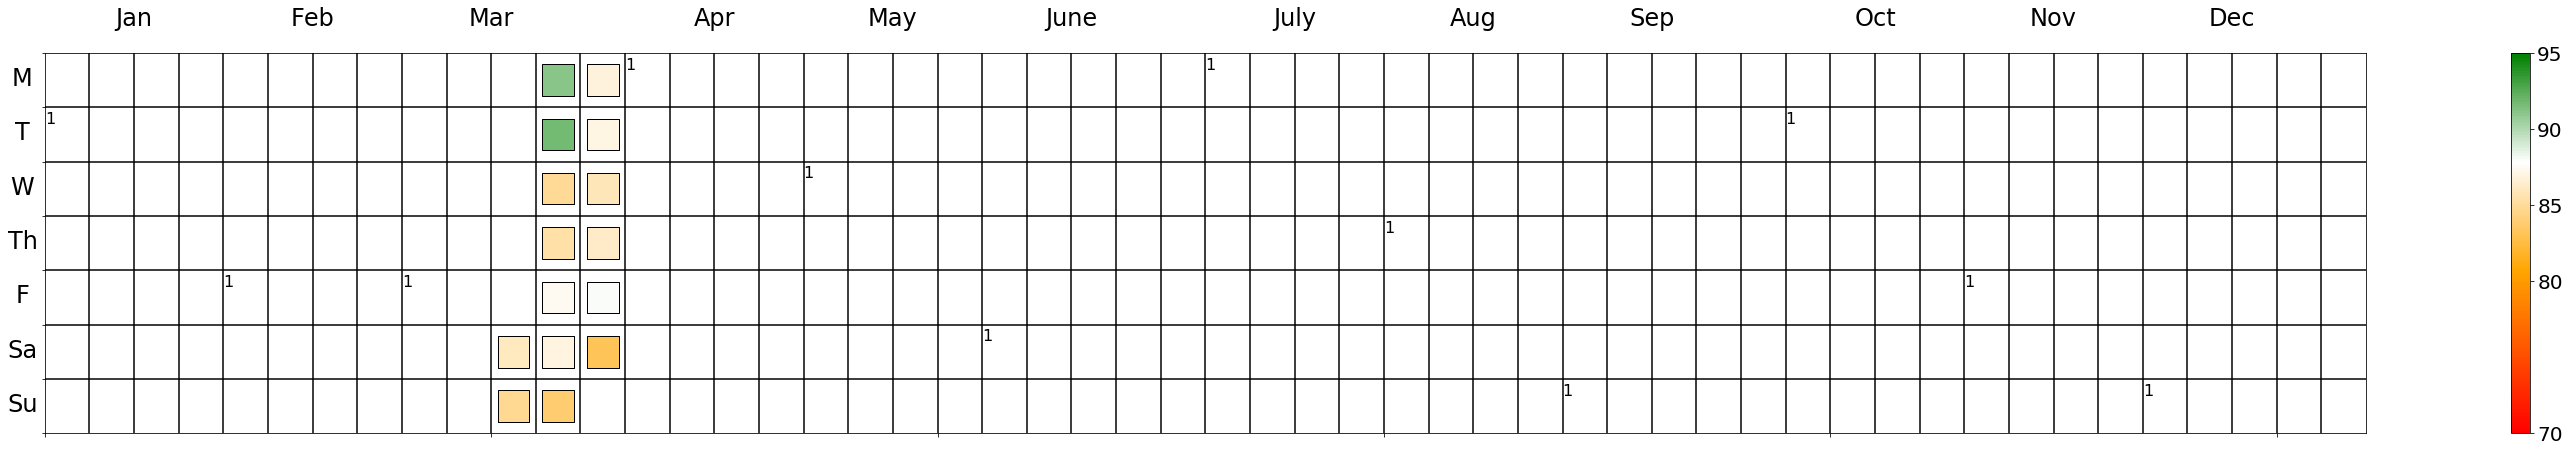

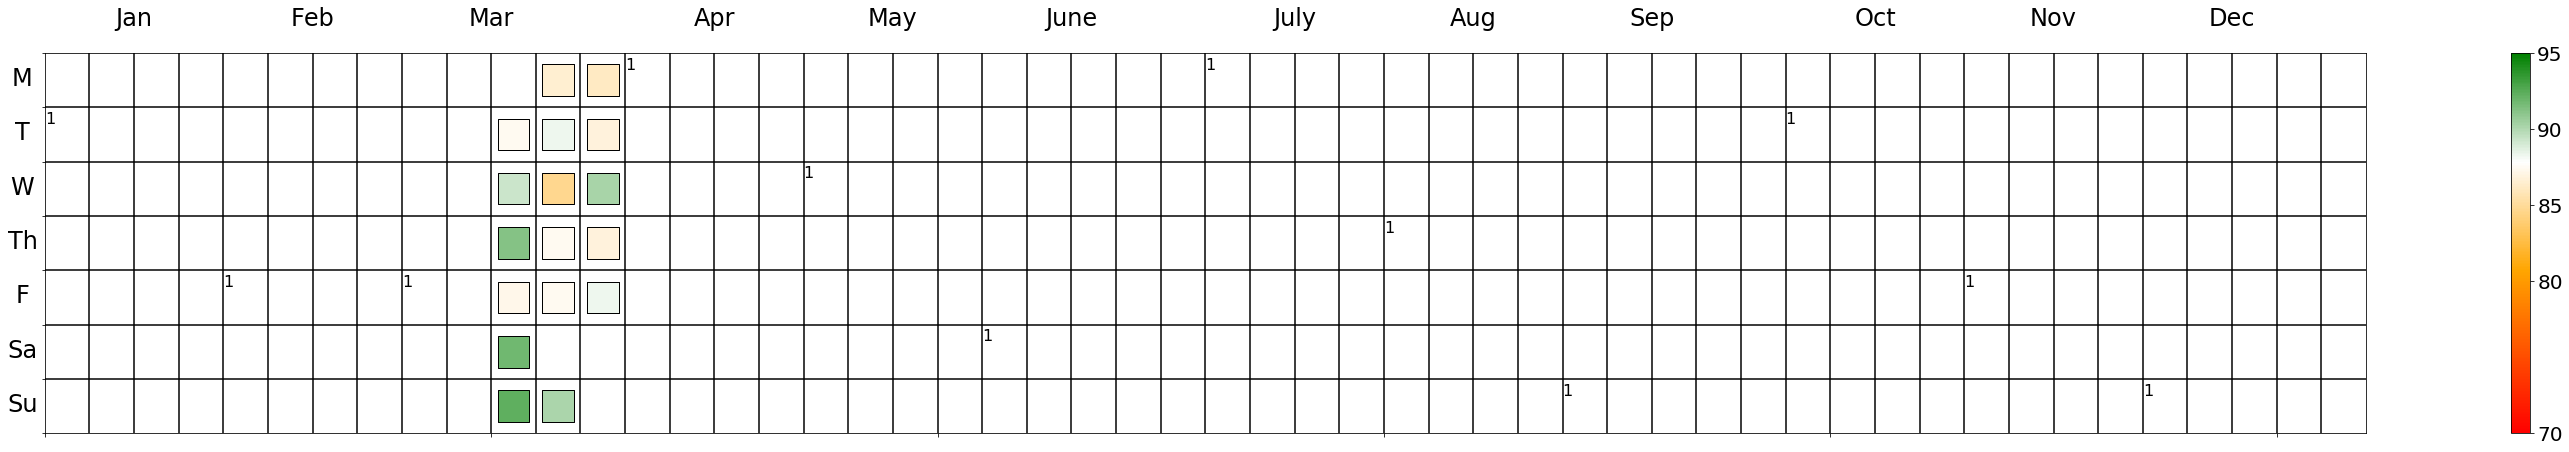

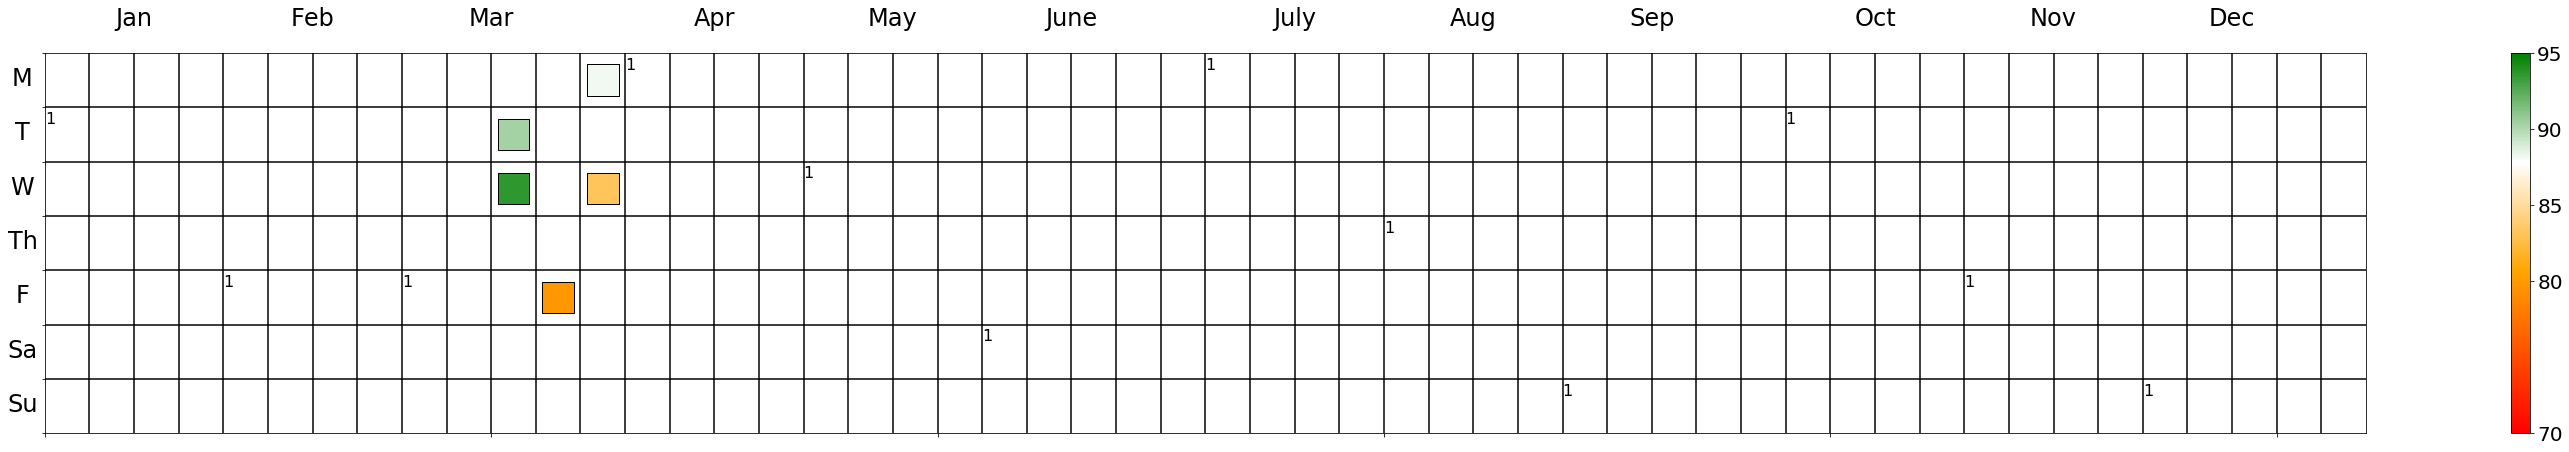

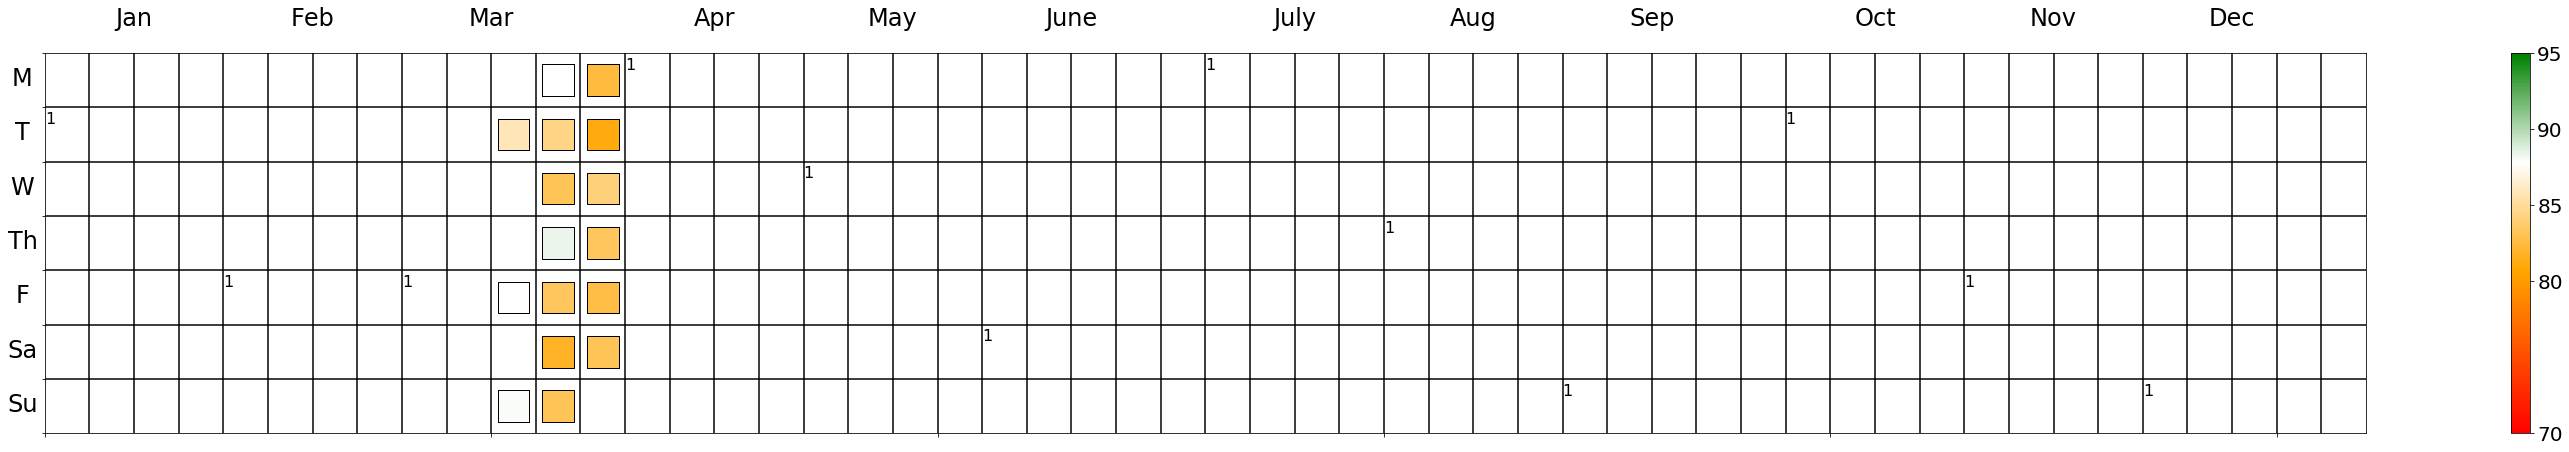

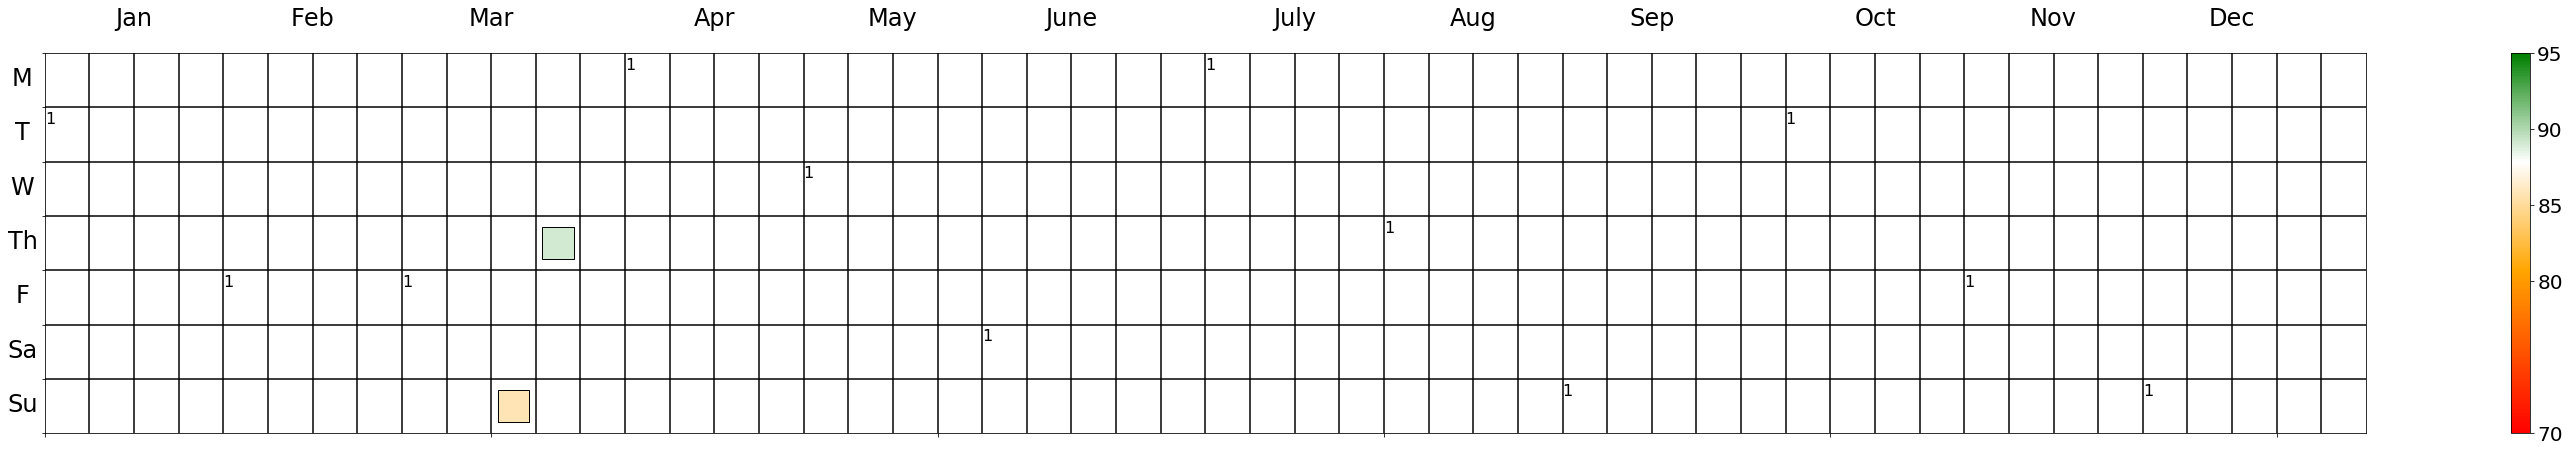

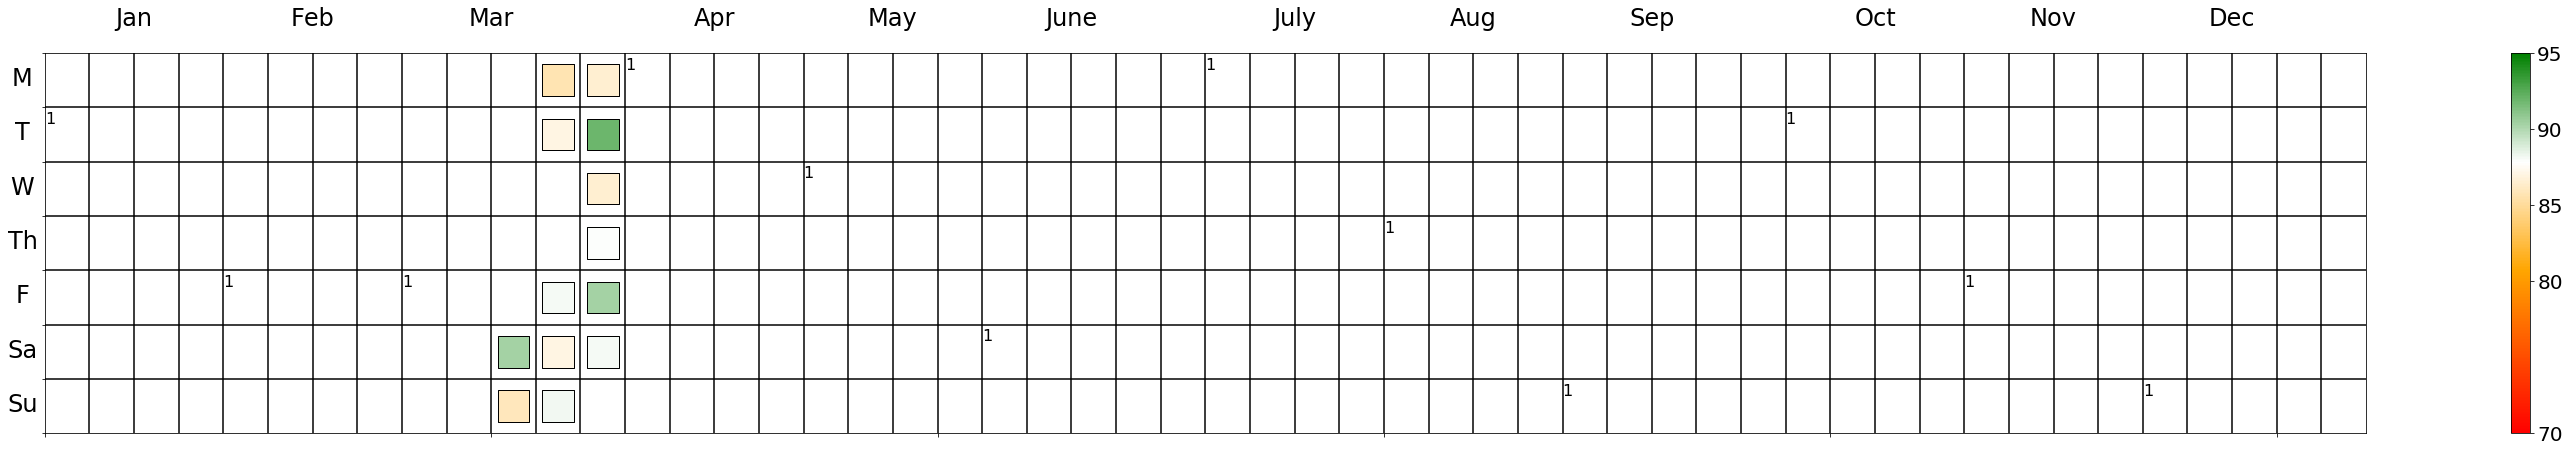

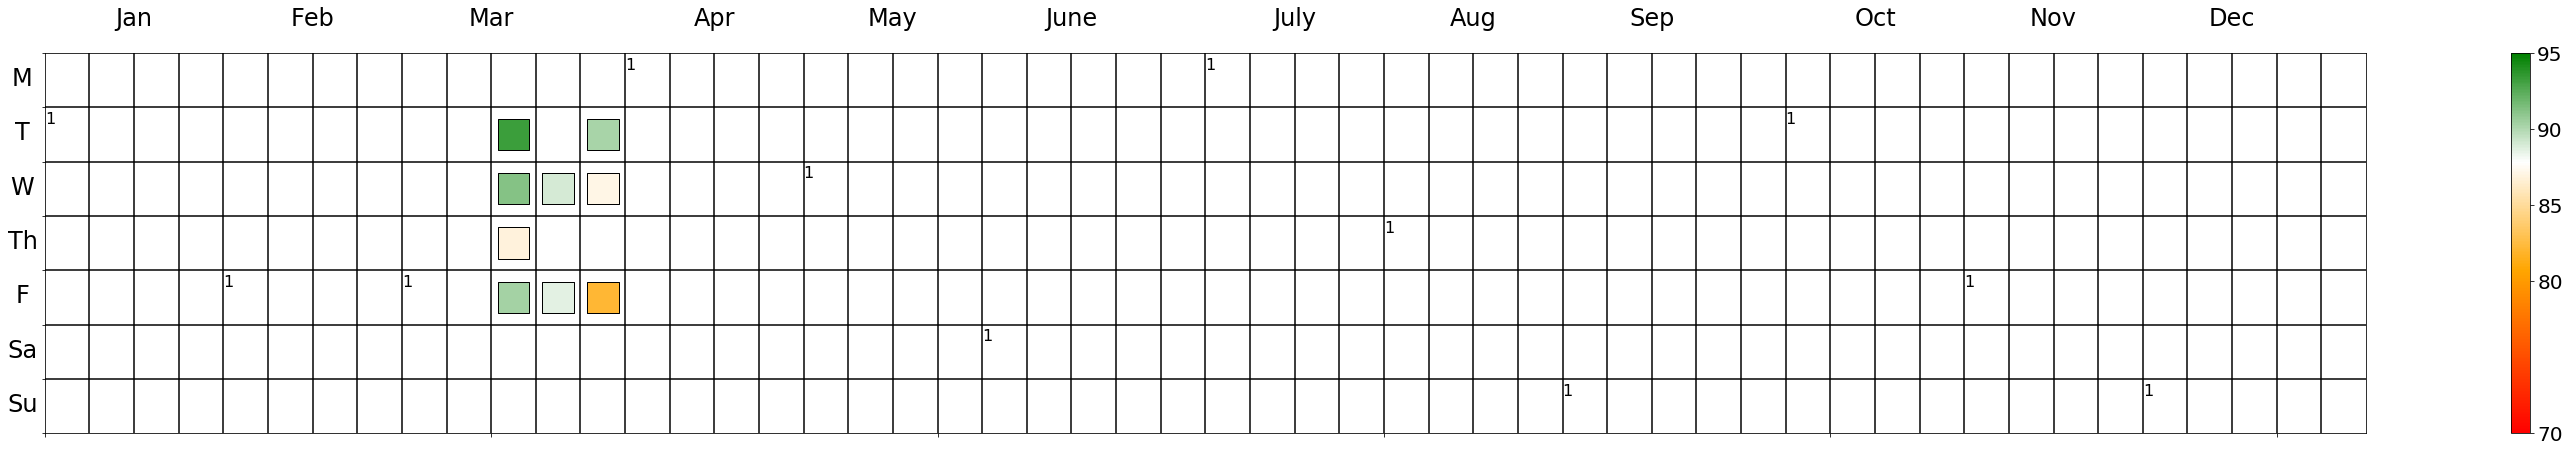

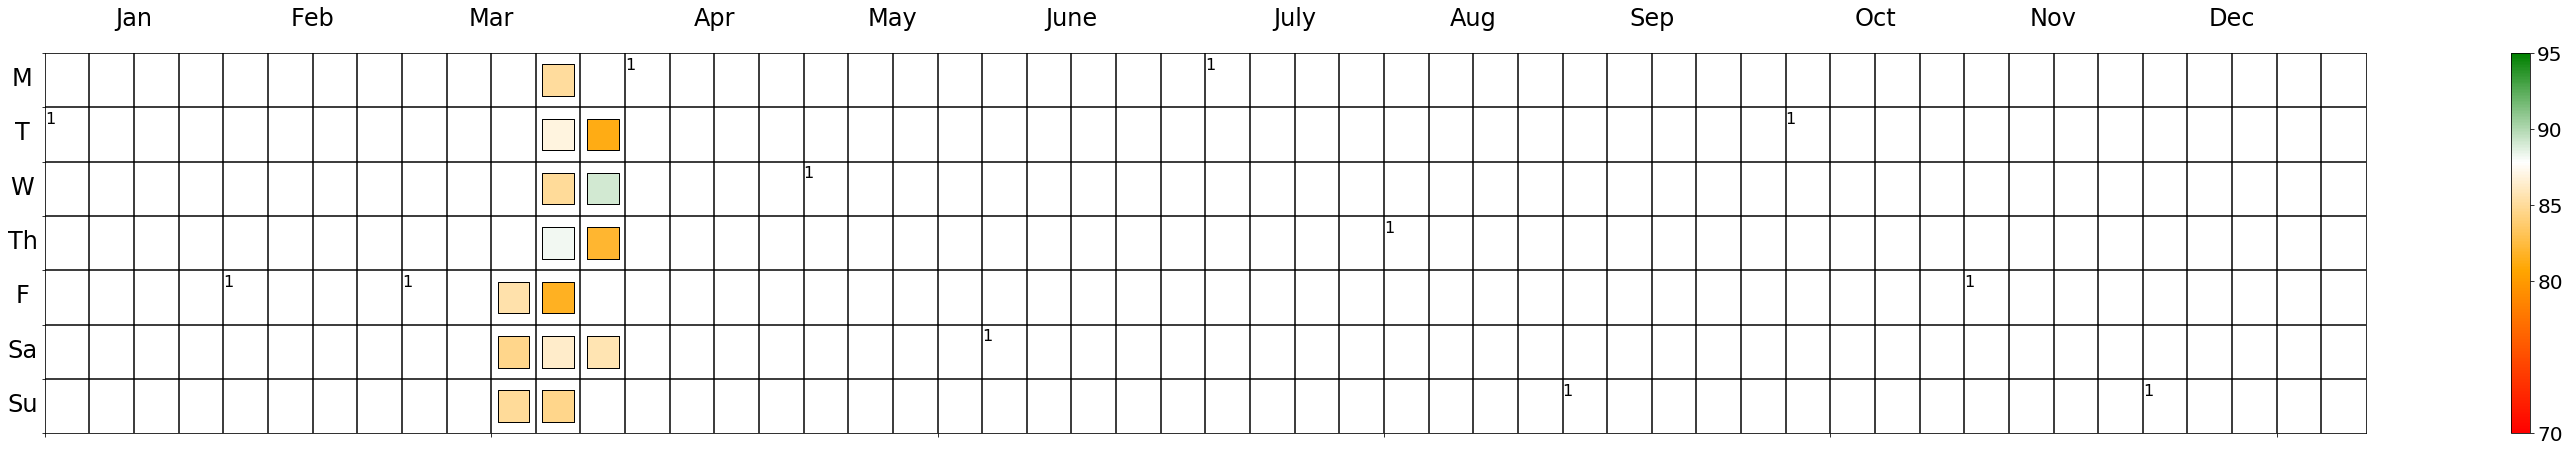

In [15]:
limits = [0,50,100,150,200,300,500]
colors = ['green','yellow','orange','red','purple','maroon']
for name in PMMetrics_byInd.index:
    plotHeatMap(PMMetrics_byInd[name].index,PMMetrics_byInd[name]['Median'],limits,colors)
limits = [70,80,85,90,95]
colors = ['red','orange','white','green']
for name in SM_byID.index:
    plotHeatMap(SM_byID[name].index,SM_byID[name]['Efficiency'],limits,colors)
    
    